# Multirotor trajectory and design optimization with FAST-OAD

FAST-OAD is a framework for performing rapid Overall Aircraft Design co-developped by ONERA and ISAE-SUPAERO. The computational core of FAST-OAD is based on the  [OpenMDAO framework](https://openmdao.org/).

## 1. Setting up and analyzing the initial problem

To organize our work, we propose to use two user folders `data/` and `workdir/`. For instance, in `data/` we store a XML file which describes the the multirotor. In `workdir/`, we store files generated or modified by FAST-OAD.

In [1]:
import os
import os.path as pth
import openmdao.api as om
from fastoad import api
import logging
from fastoad.utils.postprocessing import VariableViewer
import shutil
from models.register import register_openmdao_systems
from models.trajectory import plot_trajectory
register_openmdao_systems()
DATA_FOLDER_PATH = 'data'

WORK_FOLDER_PATH = 'workdir'

DESIGN_CONFIGURATION_FILE = pth.join(DATA_FOLDER_PATH, 'multirotor_design.toml')
TRAJECTORY_CONFIGURATION_FILE = pth.join(DATA_FOLDER_PATH, 'multirotor_trajectory.toml')
CO_DESIGN_CONFIGURATION_FILE = pth.join(DATA_FOLDER_PATH, 'multirotor_codesign.toml')
REF_INPUT_FILE = pth.join(DATA_FOLDER_PATH,'problem_inputs_ref.xml')
# For having log messages on screen
logging.basicConfig(level=logging.INFO, format='%(levelname)-8s: %(message)s')

# For using all screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


## 1 - Design optimization of the multirotor

In [2]:
api.generate_inputs(DESIGN_CONFIGURATION_FILE, REF_INPUT_FILE, overwrite=True)

INFO    : Problem inputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\workdir\problem_inputs.xml


In [3]:
INPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_inputs.xml')
api.variable_viewer(INPUT_FILE)

In [4]:
api.optimization_viewer(DESIGN_CONFIGURATION_FILE)

In [5]:
optim_problem_design = api.optimize_problem(DESIGN_CONFIGURATION_FILE, overwrite=True)

Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02212420000000037 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02947139999999937 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.027385499999999396 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.021942499999999754 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.03032330000000094 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.024206300000001235 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.020042400000001237 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019198400000000504 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01952

Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01957880000000145 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02029500000000084 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.018820399999999182 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02082160000000144 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.023253199999999197 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.021801699999999258 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.024073700000000642 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02083119999999994 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.020854

Elapsed simulation time: 0.019643500000000813 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019212500000000077 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01881919999999937 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01921500000000087 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02398220000000073 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.018654999999998978 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019136599999999504 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.018393700000000734 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01861139999999928 seconds.
Simulation interval    : 0.0 - 3.9999

Simulation interval    : 0.0 - 4.000001 seconds.
Elapsed simulation time: 0.025900099999999426 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02025779999999955 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019351399999999686 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.020784600000000708 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.021575799999999035 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.018933500000001047 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01946719999999935 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.022202200000000616 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02130260000000

INFO    : Computation finished after 7.6 seconds
INFO    : Problem outputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\workdir\problem_outputs.xml


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.120191309698671
            Iterations: 11
            Function evaluations: 12
            Gradient evaluations: 11
Optimization Complete
-----------------------------------


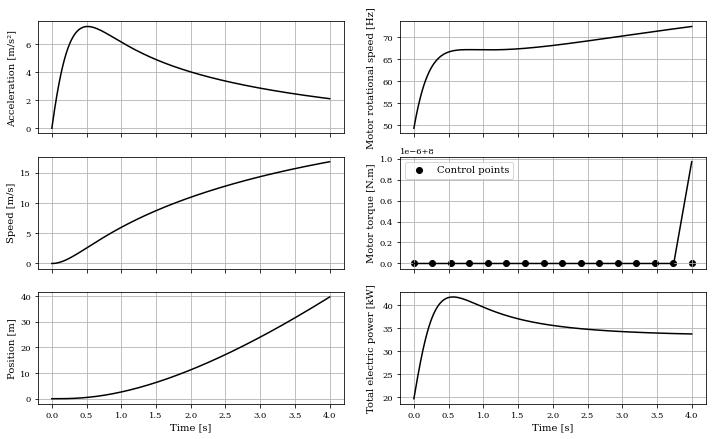

In [6]:
fig = plot_trajectory(optim_problem_design.model.trajectory.trajectory.res, problem=optim_problem_design)

In [7]:
fig.savefig("design_openmdao.pdf")

In [8]:
OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_outputs.xml')
DESIGN_OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_outputs_design.xml')
shutil.copy(OUTPUT_FILE, DESIGN_OUTPUT_FILE)

'workdir\\problem_outputs_design.xml'

In [9]:
api.optimization_viewer(DESIGN_CONFIGURATION_FILE)

In [10]:
api.variable_viewer(OUTPUT_FILE)

## 2 - Trajectory optimization of the multirotor

In [11]:
api.generate_inputs(TRAJECTORY_CONFIGURATION_FILE, DESIGN_OUTPUT_FILE, overwrite=True)

INFO    : Problem inputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\workdir\problem_inputs.xml


In [12]:
INPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_inputs.xml')
api.variable_viewer(INPUT_FILE)

In [13]:
api.optimization_viewer(TRAJECTORY_CONFIGURATION_FILE)

In [14]:
optim_problem_trajectory = api.optimize_problem(TRAJECTORY_CONFIGURATION_FILE, overwrite=True)

Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.023431099999999816 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019267700000000332 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.018966599999998834 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01901369999999858 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01912450000000021 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02088110000000043 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019743299999998243 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02127750000000006 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.023369

Simulation interval    : 0.0 - 3.2851045623976907 seconds.
Elapsed simulation time: 0.023892100000001193 seconds.
Simulation interval    : 0.0 - 3.2851045623976907 seconds.
Elapsed simulation time: 0.018701100000001247 seconds.
Simulation interval    : 0.0 - 3.2851045623976907 seconds.
Elapsed simulation time: 0.019893400000000838 seconds.
Simulation interval    : 0.0 - 3.2851045623976907 seconds.
Elapsed simulation time: 0.01844690000000071 seconds.
Simulation interval    : 0.0 - 3.3711839381052817 seconds.
Elapsed simulation time: 0.03773389999999921 seconds.
Simulation interval    : 0.0 - 3.325493690088632 seconds.
Elapsed simulation time: 0.019243500000001745 seconds.
Simulation interval    : 0.0 - 3.325493690088632 seconds.
Elapsed simulation time: 0.02160880000000276 seconds.
Simulation interval    : 0.0 - 3.325493690088632 seconds.
Elapsed simulation time: 0.01917140000000117 seconds.
Simulation interval    : 0.0 - 3.325493690088632 seconds.
Elapsed simulation time: 0.0192292999

Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.01864280000000207 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.018861900000000986 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.019029700000000815 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.019437500000002217 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.020378900000000755 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.020248299999998665 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.019004699999999985 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.019222899999999044 seconds.
Simulation interval    : 0.0 - 3.4396995876293293 seconds.
Elapsed simulation time: 0.018

Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.02082809999999924 seconds.
Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.020524000000001763 seconds.
Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.019576800000002947 seconds.
Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.019570999999999117 seconds.
Simulation interval    : 0.0 - 3.554912332636952 seconds.
Elapsed simulation time: 0.01865139999999954 seconds.
Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.019593600000000322 seconds.
Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.01893490000000142 seconds.
Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.018719399999998387 seconds.
Simulation interval    : 0.0 - 3.5549113326369515 seconds.
Elapsed simulation time: 0.018722

Simulation interval    : 0.0 - 3.5917677193262327 seconds.
Elapsed simulation time: 0.022720499999998367 seconds.
Simulation interval    : 0.0 - 3.5917677193262327 seconds.
Elapsed simulation time: 0.018469600000003084 seconds.
Simulation interval    : 0.0 - 3.5917677193262327 seconds.
Elapsed simulation time: 0.020012099999998867 seconds.
Simulation interval    : 0.0 - 3.5917677193262327 seconds.
Elapsed simulation time: 0.018903700000002743 seconds.
Simulation interval    : 0.0 - 3.5917677193262327 seconds.
Elapsed simulation time: 0.01999190000000084 seconds.
Simulation interval    : 0.0 - 3.5799441049955267 seconds.
Elapsed simulation time: 0.01914199999999866 seconds.
Simulation interval    : 0.0 - 3.5865103956071835 seconds.
Elapsed simulation time: 0.022153800000001667 seconds.
Simulation interval    : 0.0 - 3.5890005121418547 seconds.
Elapsed simulation time: 0.019839600000000956 seconds.
Simulation interval    : 0.0 - 3.5890005121418547 seconds.
Elapsed simulation time: 0.0215

Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.01862790000000203 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.019114300000001805 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.018784400000001256 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.018539000000000527 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.01870219999999989 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.02620590000000078 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.018980700000000184 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.01884199999999936 seconds.
Simulation interval    : 0.0 - 3.6885905522079807 seconds.
Elapsed simulation time: 0.019032

Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.021313300000002755 seconds.
Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.02012769999999975 seconds.
Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.01949809999999985 seconds.
Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.020654100000001563 seconds.
Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.020808999999999855 seconds.
Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.018511799999998857 seconds.
Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.01938379999999995 seconds.
Simulation interval    : 0.0 - 3.708957745961819 seconds.
Elapsed simulation time: 0.018938500000000857 seconds.
Simulation interval    : 0.0 - 3.7089567459618187 seconds.
Elapsed simulation time: 0.019734

Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.03529590000000127 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.022019000000000233 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.020976400000002116 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.02065329999999932 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.019932799999999418 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.019221099999999325 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.020927199999999146 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.018680700000000883 seconds.
Simulation interval    : 0.0 - 3.7069566721786416 seconds.
Elapsed simulation time: 0.0217

Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.021081000000002348 seconds.
Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.018615799999999183 seconds.
Simulation interval    : 0.0 - 3.7960238572429432 seconds.
Elapsed simulation time: 0.018164499999997474 seconds.
Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.018372200000001726 seconds.
Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.019948900000002823 seconds.
Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.018859199999994303 seconds.
Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.019735899999993478 seconds.
Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.019212799999998253 seconds.
Simulation interval    : 0.0 - 3.7960228572429435 seconds.
Elapsed simulation time: 0.02

Simulation interval    : 0.0 - 3.796314068846393 seconds.
Elapsed simulation time: 0.018798300000000268 seconds.
Simulation interval    : 0.0 - 3.796314068846393 seconds.
Elapsed simulation time: 0.0195155999999983 seconds.
Simulation interval    : 0.0 - 3.796314068846393 seconds.
Elapsed simulation time: 0.018768600000001356 seconds.
Simulation interval    : 0.0 - 3.3448441509202747 seconds.
Elapsed simulation time: 0.018489899999998727 seconds.
Simulation interval    : 0.0 - 3.6658515576298973 seconds.
Elapsed simulation time: 0.018884700000000976 seconds.
Simulation interval    : 0.0 - 3.7554401009731064 seconds.
Elapsed simulation time: 0.018504399999997645 seconds.
Simulation interval    : 0.0 - 3.7827638991567536 seconds.
Elapsed simulation time: 0.021208999999998923 seconds.
Simulation interval    : 0.0 - 3.791269507854308 seconds.
Elapsed simulation time: 0.019162399999999025 seconds.
Simulation interval    : 0.0 - 3.793660325309053 seconds.
Elapsed simulation time: 0.019014300

Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.019610200000002465 seconds.
Simulation interval    : 0.0 - 3.7716978409428408 seconds.
Elapsed simulation time: 0.018701499999998816 seconds.
Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.019257600000003094 seconds.
Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.019156399999999962 seconds.
Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.01951299999999634 seconds.
Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.021545500000001994 seconds.
Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.023944000000000187 seconds.
Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.018662399999996637 seconds.
Simulation interval    : 0.0 - 3.77169684094284 seconds.
Elapsed simulation time: 0.019407999999998538 

Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.018685999999995317 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.018636000000000763 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.01845639999999804 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.018499399999996058 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.018521399999997357 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.019078299999996773 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.020581200000002298 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.018850999999997953 seconds.
Simulation interval    : 0.0 - 3.9973928278501174 seconds.
Elapsed simulation time: 0.018

Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.022257299999999702 seconds.
Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.0244622000000021 seconds.
Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.01981150000000298 seconds.
Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.02155439999999942 seconds.
Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.024036500000001126 seconds.
Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.020044200000000956 seconds.
Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.020246899999996515 seconds.
Simulation interval    : 0.0 - 3.9883956792303343 seconds.
Elapsed simulation time: 0.019322099999996567 seconds.
Simulation interval    : 0.0 - 3.97287749952061 seconds.
Elapsed simulation time: 0.02050590

Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.018746800000002395 seconds.
Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.01930860000000223 seconds.
Simulation interval    : 0.0 - 3.981774872086406 seconds.
Elapsed simulation time: 0.019667299999994725 seconds.
Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.019354900000003283 seconds.
Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.02467860000000144 seconds.
Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.01885700000000412 seconds.
Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.023994600000001753 seconds.
Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.020598700000000747 seconds.
Simulation interval    : 0.0 - 3.9817738720864053 seconds.
Elapsed simulation time: 0.024074

Simulation interval    : 0.0 - 3.1692377631102286 seconds.
Elapsed simulation time: 0.020930700000000968 seconds.
Simulation interval    : 0.0 - 3.8362161497875924 seconds.
Elapsed simulation time: 0.025774300000001915 seconds.
Simulation interval    : 0.0 - 3.9408253415196226 seconds.
Elapsed simulation time: 0.02119030000000066 seconds.
Simulation interval    : 0.0 - 3.9545692154455105 seconds.
Elapsed simulation time: 0.02433500000000066 seconds.
Simulation interval    : 0.0 - 3.9545692154455105 seconds.
Elapsed simulation time: 0.019033499999999037 seconds.
Simulation interval    : 0.0 - 3.9545692154455105 seconds.
Elapsed simulation time: 0.021022599999994895 seconds.
Simulation interval    : 0.0 - 3.9545692154455105 seconds.
Elapsed simulation time: 0.020705800000001773 seconds.
Simulation interval    : 0.0 - 3.9545692154455105 seconds.
Elapsed simulation time: 0.020917499999995925 seconds.
Simulation interval    : 0.0 - 3.9545692154455105 seconds.
Elapsed simulation time: 0.0188

Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.023621400000003234 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.018712200000003065 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.01954589999999712 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.02114699999999914 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.01915239999999585 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.02297460000000484 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.019001299999999333 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.01856599999999986 seconds.
Simulation interval    : 0.0 - 3.9546534376878792 seconds.
Elapsed simulation time: 0.0186142

Simulation interval    : 0.0 - 3.32099781010677 seconds.
Elapsed simulation time: 0.019722600000001478 seconds.
Simulation interval    : 0.0 - 3.8355201406712447 seconds.
Elapsed simulation time: 0.0192584999999994 seconds.
Simulation interval    : 0.0 - 3.929864301221419 seconds.
Elapsed simulation time: 0.01928399999999897 seconds.
Simulation interval    : 0.0 - 3.949079580355257 seconds.
Elapsed simulation time: 0.018788299999997093 seconds.
Simulation interval    : 0.0 - 3.9530807202282214 seconds.
Elapsed simulation time: 0.021686299999998937 seconds.
Simulation interval    : 0.0 - 3.9539169211930343 seconds.
Elapsed simulation time: 0.024142499999996403 seconds.
Simulation interval    : 0.0 - 3.9540868551645585 seconds.
Elapsed simulation time: 0.020453599999996186 seconds.
Simulation interval    : 0.0 - 3.9540868551645585 seconds.
Elapsed simulation time: 0.01948609999999462 seconds.
Simulation interval    : 0.0 - 3.9540868551645585 seconds.
Elapsed simulation time: 0.0230213000

Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.018831500000004553 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.01898769999999672 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.019542899999997587 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.01898410000000439 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.029208900000000426 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.0245923000000019 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.019594500000003734 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.02121259999999836 seconds.
Simulation interval    : 0.0 - 4.002508473756462 seconds.
Elapsed simulation time: 0.0217580999999995

Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.018928999999999974 seconds.
Simulation interval    : 0.0 - 3.9607829135559838 seconds.
Elapsed simulation time: 0.01909559999999999 seconds.
Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.01886840000000234 seconds.
Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.01875490000000468 seconds.
Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.01894360000000006 seconds.
Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.0191250000000025 seconds.
Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.019333400000000722 seconds.
Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.02050769999999602 seconds.
Simulation interval    : 0.0 - 3.960781913555984 seconds.
Elapsed simulation time: 0.02047530000000108

Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.019180800000000886 seconds.
Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.018452400000001035 seconds.
Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.018755500000004588 seconds.
Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.01902330000000063 seconds.
Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.018576500000001772 seconds.
Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.01884650000000221 seconds.
Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.018341100000000665 seconds.
Simulation interval    : 0.0 - 3.937521364712802 seconds.
Elapsed simulation time: 0.018823799999999835 seconds.
Simulation interval    : 0.0 - 3.9375203647128014 seconds.
Elapsed simulation time: 0.01910

Simulation interval    : 0.0 - 3.9352783022292885 seconds.
Elapsed simulation time: 0.01998230000000234 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.019561500000001786 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.021363899999997216 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.020746400000000165 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.02130499999999813 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.02267129999999895 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.01861900000000105 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.0186551000000037 seconds.
Simulation interval    : 0.0 - 3.9354410580164534 seconds.
Elapsed simulation time: 0.01888839

Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.018993399999999383 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.02359830000000329 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.02037909999999954 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.018627500000000907 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.019423099999997362 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.019467500000004634 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.020113500000000784 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.0190014000000005 seconds.
Simulation interval    : 0.0 - 3.9344204752128036 seconds.
Elapsed simulation time: 0.019961

Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.018946299999996086 seconds.
Simulation interval    : 0.0 - 3.9328345364251542 seconds.
Elapsed simulation time: 0.01888929999999789 seconds.
Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.019320699999994417 seconds.
Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.019221399999999278 seconds.
Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.019042699999999968 seconds.
Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.018932200000001842 seconds.
Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.024178900000002557 seconds.
Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.019458799999995335 seconds.
Simulation interval    : 0.0 - 3.9328335364251537 seconds.
Elapsed simulation time: 0.019

Simulation interval    : 0.0 - 3.9268507528405774 seconds.
Elapsed simulation time: 0.019098699999993585 seconds.
Simulation interval    : 0.0 - 3.9303691250952886 seconds.
Elapsed simulation time: 0.019138599999998007 seconds.
Simulation interval    : 0.0 - 3.9307209623207595 seconds.
Elapsed simulation time: 0.02331190000000305 seconds.
Simulation interval    : 0.0 - 3.9307209623207595 seconds.
Elapsed simulation time: 0.019363900000001877 seconds.
Simulation interval    : 0.0 - 3.9307209623207595 seconds.
Elapsed simulation time: 0.022404000000001645 seconds.
Simulation interval    : 0.0 - 3.9307209623207595 seconds.
Elapsed simulation time: 0.019660700000002862 seconds.
Simulation interval    : 0.0 - 3.9307209623207595 seconds.
Elapsed simulation time: 0.020699000000000467 seconds.
Simulation interval    : 0.0 - 3.9307209623207595 seconds.
Elapsed simulation time: 0.018839100000000997 seconds.
Simulation interval    : 0.0 - 3.9307209623207595 seconds.
Elapsed simulation time: 0.020

Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.02349050000000119 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.03204410000000024 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.025302500000002226 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.01977759999999762 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.018717299999998716 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.01944340000000011 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.02093200000000195 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.02013489999999507 seconds.
Simulation interval    : 0.0 - 3.930528928987908 seconds.
Elapsed simulation time: 0.01925800000000066

Simulation interval    : 0.0 - 3.8199865653962863 seconds.
Elapsed simulation time: 0.03050840000000221 seconds.
Simulation interval    : 0.0 - 3.9194560194010797 seconds.
Elapsed simulation time: 0.02906889999999862 seconds.
Simulation interval    : 0.0 - 3.929402964801559 seconds.
Elapsed simulation time: 0.021767100000005257 seconds.
Simulation interval    : 0.0 - 3.930397659341607 seconds.
Elapsed simulation time: 0.033383800000009956 seconds.
Simulation interval    : 0.0 - 3.9304971287956114 seconds.
Elapsed simulation time: 0.019469299999997247 seconds.
Simulation interval    : 0.0 - 3.9304971287956114 seconds.
Elapsed simulation time: 0.01928290000000743 seconds.
Simulation interval    : 0.0 - 3.9304971287956114 seconds.
Elapsed simulation time: 0.01893850000000441 seconds.
Simulation interval    : 0.0 - 3.9304971287956114 seconds.
Elapsed simulation time: 0.01877689999999177 seconds.
Simulation interval    : 0.0 - 3.9304971287956114 seconds.
Elapsed simulation time: 0.023697000

Simulation interval    : 0.0 - 3.930474072667307 seconds.
Elapsed simulation time: 0.02088960000000384 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.01985589999999604 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.018976499999993734 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.020072100000007254 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.018802199999996105 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.019280199999997194 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.018829900000000066 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.018706700000009846 seconds.
Simulation interval    : 0.0 - 3.9304730726673074 seconds.
Elapsed simulation time: 0.01857

Simulation interval    : 0.0 - 3.930458153997093 seconds.
Elapsed simulation time: 0.018529799999996044 seconds.
Simulation interval    : 0.0 - 3.930458153997093 seconds.
Elapsed simulation time: 0.01947330000000136 seconds.
Simulation interval    : 0.0 - 3.930458153997093 seconds.
Elapsed simulation time: 0.019016000000007693 seconds.
Simulation interval    : 0.0 - 3.930458153997093 seconds.
Elapsed simulation time: 0.01881420000000844 seconds.
Simulation interval    : 0.0 - 3.930458153997093 seconds.
Elapsed simulation time: 0.018984700000004295 seconds.
Simulation interval    : 0.0 - 3.764836786730013 seconds.
Elapsed simulation time: 0.01873030000000142 seconds.
Simulation interval    : 0.0 - 3.913896017270385 seconds.
Elapsed simulation time: 0.019181299999999624 seconds.
Simulation interval    : 0.0 - 3.9288019403244223 seconds.
Elapsed simulation time: 0.018754700000002344 seconds.
Simulation interval    : 0.0 - 3.9302925326298257 seconds.
Elapsed simulation time: 0.018664700000

Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.018743099999994683 seconds.
Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.020513399999998683 seconds.
Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.018833199999988892 seconds.
Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.023501699999997072 seconds.
Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.028724600000003875 seconds.
Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.01966009999999585 seconds.
Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.022939799999988963 seconds.
Simulation interval    : 0.0 - 3.9304516584241163 seconds.
Elapsed simulation time: 0.020905100000007337 seconds.
Simulation interval    : 0.0 - 3.9304526584241155 seconds.
Elapsed simulation time: 0.018

Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.019643299999998476 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.018688900000000785 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.018806200000000217 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.018636900000004175 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.01895600000000286 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.019004499999994096 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.01945040000001086 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.019235800000004133 seconds.
Simulation interval    : 0.0 - 3.929144645372413 seconds.
Elapsed simulation time: 0.0187241000000

Simulation interval    : 0.0 - 3.9291396247513966 seconds.
Elapsed simulation time: 0.01849179999999251 seconds.
Simulation interval    : 0.0 - 3.9291396247513966 seconds.
Elapsed simulation time: 0.018404599999996663 seconds.
Simulation interval    : 0.0 - 3.8577018811268156 seconds.
Elapsed simulation time: 0.01852909999999497 seconds.
Simulation interval    : 0.0 - 3.9219958503889383 seconds.
Elapsed simulation time: 0.020581800000002204 seconds.
Simulation interval    : 0.0 - 3.928425247315151 seconds.
Elapsed simulation time: 0.019020600000004606 seconds.
Simulation interval    : 0.0 - 3.9290681870077724 seconds.
Elapsed simulation time: 0.018879899999987515 seconds.
Simulation interval    : 0.0 - 3.9291324809770343 seconds.
Elapsed simulation time: 0.02019719999999836 seconds.
Simulation interval    : 0.0 - 3.92913891037396 seconds.
Elapsed simulation time: 0.02634779999999637 seconds.
Simulation interval    : 0.0 - 3.92913891037396 seconds.
Elapsed simulation time: 0.01923180000

Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.018769700000007106 seconds.
Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.020083700000000704 seconds.
Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.01924110000000212 seconds.
Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.018805200000002742 seconds.
Simulation interval    : 0.0 - 3.9291384164816785 seconds.
Elapsed simulation time: 0.018576400000000604 seconds.
Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.019927999999993062 seconds.
Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.019107600000012326 seconds.
Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.018927899999994224 seconds.
Simulation interval    : 0.0 - 3.929137416481678 seconds.
Elapsed simulation time: 0.01938350000

Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.028381600000003004 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.025743400000010297 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.02734259999999722 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.024438900000006925 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.020229200000002834 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.018491400000002045 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.019773000000000707 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.02013809999999694 seconds.
Simulation interval    : 0.0 - 3.9291365513771948 seconds.
Elapsed simulation time: 0.0207

Simulation interval    : 0.0 - 3.9291363792325047 seconds.
Elapsed simulation time: 0.018758900000008794 seconds.
Simulation interval    : 0.0 - 3.83720816147079 seconds.
Elapsed simulation time: 0.02142110000001196 seconds.
Simulation interval    : 0.0 - 3.919943557456333 seconds.
Elapsed simulation time: 0.02239040000000614 seconds.
Simulation interval    : 0.0 - 3.9282170970548878 seconds.
Elapsed simulation time: 0.02099450000000047 seconds.
Simulation interval    : 0.0 - 3.9290444510147426 seconds.
Elapsed simulation time: 0.020263799999995058 seconds.
Simulation interval    : 0.0 - 3.9291271864107284 seconds.
Elapsed simulation time: 0.018742799999998283 seconds.
Simulation interval    : 0.0 - 3.9291354599503268 seconds.
Elapsed simulation time: 0.018996500000000083 seconds.
Simulation interval    : 0.0 - 3.929136287304287 seconds.
Elapsed simulation time: 0.01888599999999485 seconds.
Simulation interval    : 0.0 - 3.929136287304287 seconds.
Elapsed simulation time: 0.01939150000

Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.019489899999996396 seconds.
Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.020346500000002266 seconds.
Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.02103149999999232 seconds.
Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.02094700000000671 seconds.
Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.02010310000000004 seconds.
Simulation interval    : 0.0 - 3.9290315641647364 seconds.
Elapsed simulation time: 0.03689269999999567 seconds.
Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.019912300000001437 seconds.
Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.019249099999996133 seconds.
Simulation interval    : 0.0 - 3.9290305641647367 seconds.
Elapsed simulation time: 0.019719

Simulation interval    : 0.0 - 3.9365787827941423 seconds.
Elapsed simulation time: 0.018490900000003307 seconds.
Simulation interval    : 0.0 - 3.9365787827941423 seconds.
Elapsed simulation time: 0.01906560000000468 seconds.
Simulation interval    : 0.0 - 3.8722476762738745 seconds.
Elapsed simulation time: 0.018525900000000206 seconds.
Simulation interval    : 0.0 - 3.9301456721421157 seconds.
Elapsed simulation time: 0.020766899999998145 seconds.
Simulation interval    : 0.0 - 3.93593547172894 seconds.
Elapsed simulation time: 0.02029689999999107 seconds.
Simulation interval    : 0.0 - 3.93593547172894 seconds.
Elapsed simulation time: 0.022133800000005976 seconds.
Simulation interval    : 0.0 - 3.93593547172894 seconds.
Elapsed simulation time: 0.0208987000000036 seconds.
Simulation interval    : 0.0 - 3.93593547172894 seconds.
Elapsed simulation time: 0.023533799999995608 seconds.
Simulation interval    : 0.0 - 3.93593547172894 seconds.
Elapsed simulation time: 0.0253474000000011

Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.021135399999991478 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.02328350000000512 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.01980840000000228 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.02221749999999645 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.020034600000002456 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.01901539999998647 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.018686900000005835 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.020113399999999615 seconds.
Simulation interval    : 0.0 - 3.93356939667454 seconds.
Elapsed simulation time: 0.0209054999999978 seconds

Simulation interval    : 0.0 - 3.9334977537548377 seconds.
Elapsed simulation time: 0.018941200000000435 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.024026100000000383 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.019275900000010893 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.018810999999999467 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.01921850000000802 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.019248900000008007 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.01908650000000023 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.018544199999993793 seconds.
Simulation interval    : 0.0 - 3.9334967537548375 seconds.
Elapsed simulation time: 0.0206

Simulation interval    : 0.0 - 3.6968128532493 seconds.
Elapsed simulation time: 0.019207399999999097 seconds.
Simulation interval    : 0.0 - 3.9093189039862106 seconds.
Elapsed simulation time: 0.027013699999997698 seconds.
Simulation interval    : 0.0 - 3.930569509059903 seconds.
Elapsed simulation time: 0.01908200000001159 seconds.
Simulation interval    : 0.0 - 3.9326527595324814 seconds.
Elapsed simulation time: 0.01860820000000274 seconds.
Simulation interval    : 0.0 - 3.9326527595324814 seconds.
Elapsed simulation time: 0.0196513000000067 seconds.
Simulation interval    : 0.0 - 3.9326527595324814 seconds.
Elapsed simulation time: 0.019261599999992995 seconds.
Simulation interval    : 0.0 - 3.9326527595324814 seconds.
Elapsed simulation time: 0.0178717000000006 seconds.
Simulation interval    : 0.0 - 3.9326527595324814 seconds.
Elapsed simulation time: 0.01891930000000741 seconds.
Simulation interval    : 0.0 - 3.9326527595324814 seconds.
Elapsed simulation time: 0.0192511999999

Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.01878590000001168 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.019178199999998924 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.018456400000005146 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.01949820000000102 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.0189226999999903 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.01856440000000248 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.02105489999999577 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.01894219999999791 seconds.
Simulation interval    : 0.0 - 3.9325261322902536 seconds.
Elapsed simulation time: 0.018366600

Simulation interval    : 0.0 - 3.694125793024653 seconds.
Elapsed simulation time: 0.03656319999998914 seconds.
Simulation interval    : 0.0 - 3.9086726063601454 seconds.
Elapsed simulation time: 0.01885090000000389 seconds.
Simulation interval    : 0.0 - 3.9301272876936943 seconds.
Elapsed simulation time: 0.020008899999993446 seconds.
Simulation interval    : 0.0 - 3.9321590558664132 seconds.
Elapsed simulation time: 0.019406799999998725 seconds.
Simulation interval    : 0.0 - 3.932458216854399 seconds.
Elapsed simulation time: 0.0186362000000031 seconds.
Simulation interval    : 0.0 - 3.9325021551583785 seconds.
Elapsed simulation time: 0.01888449999999864 seconds.
Simulation interval    : 0.0 - 3.9325021551583785 seconds.
Elapsed simulation time: 0.019046299999999405 seconds.
Simulation interval    : 0.0 - 3.9325021551583785 seconds.
Elapsed simulation time: 0.019621299999997177 seconds.
Simulation interval    : 0.0 - 3.9325021551583785 seconds.
Elapsed simulation time: 0.020870500

Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.021455099999997174 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.02095830000000376 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.021309000000002243 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.021669299999999225 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.019040300000000343 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.021620400000003315 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.01911710000000255 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.01851130000000012 seconds.
Simulation interval    : 0.0 - 3.9326161428735245 seconds.
Elapsed simulation time: 0.01857

Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.020900900000000888 seconds.
Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.02074700000000007 seconds.
Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.01882609999999829 seconds.
Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.020816899999999805 seconds.
Simulation interval    : 0.0 - 3.932591562221316 seconds.
Elapsed simulation time: 0.022908799999996177 seconds.
Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.019610500000013076 seconds.
Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.018263599999997382 seconds.
Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.020544499999999744 seconds.
Simulation interval    : 0.0 - 3.9325905622213155 seconds.
Elapsed simulation time: 0.01846

Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.01898140000000126 seconds.
Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.02040989999998999 seconds.
Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.02052550000000508 seconds.
Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.020870000000002165 seconds.
Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.02127980000000207 seconds.
Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.0214100999999971 seconds.
Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.020717700000005834 seconds.
Simulation interval    : 0.0 - 3.932582400163789 seconds.
Elapsed simulation time: 0.019771199999993883 seconds.
Simulation interval    : 0.0 - 3.9326677460615183 seconds.
Elapsed simulation time: 0.0181554000000119

Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.01940950000000896 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.023266499999991197 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.020885799999987853 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.020783600000001456 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.018694600000003447 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.019489599999999996 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.01898879999998826 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.01894839999999931 seconds.
Simulation interval    : 0.0 - 3.93263041400704 seconds.
Elapsed simulation time: 0.019491000000002145 seco

Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.01848169999999527 seconds.
Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.019203399999994986 seconds.
Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.01893289999999581 seconds.
Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.021488700000006133 seconds.
Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.01875289999999552 seconds.
Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.01976799999999912 seconds.
Simulation interval    : 0.0 - 3.932425509457028 seconds.
Elapsed simulation time: 0.02107639999999833 seconds.
Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.025423899999992727 seconds.
Simulation interval    : 0.0 - 3.9324245094570283 seconds.
Elapsed simulation time: 0.01868009

Simulation interval    : 0.0 - 3.932459998739369 seconds.
Elapsed simulation time: 0.01900320000000022 seconds.
Simulation interval    : 0.0 - 3.932459998739369 seconds.
Elapsed simulation time: 0.019677799999996637 seconds.
Simulation interval    : 0.0 - 3.932459998739369 seconds.
Elapsed simulation time: 0.01889639999998849 seconds.
Simulation interval    : 0.0 - 3.932376692709064 seconds.
Elapsed simulation time: 0.019045800000000668 seconds.
Simulation interval    : 0.0 - 3.932376692709064 seconds.
Elapsed simulation time: 0.020023600000001807 seconds.
Simulation interval    : 0.0 - 3.932376692709064 seconds.
Elapsed simulation time: 0.02034639999999399 seconds.
Simulation interval    : 0.0 - 3.932376692709064 seconds.
Elapsed simulation time: 0.020526099999997882 seconds.
Simulation interval    : 0.0 - 3.932376692709064 seconds.
Elapsed simulation time: 0.021983200000008196 seconds.
Simulation interval    : 0.0 - 3.932376692709064 seconds.
Elapsed simulation time: 0.02607090000000

Elapsed simulation time: 0.020153499999992164 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.019438499999992587 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.018410700000004 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.02164570000000765 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.019229699999996797 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.01852549999999553 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.01932220000000484 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.018941400000002773 seconds.
Simulation interval    : 0.0 - 3.9316781753145946 seconds.
Elapsed simulation time: 0.01897549999999626 seconds.
Simulation interval    : 0.0 - 3.9312668

Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.01999770000000467 seconds.
Simulation interval    : 0.0 - 3.931204458872693 seconds.
Elapsed simulation time: 0.02144680000000676 seconds.
Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.024574899999990407 seconds.
Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.018310499999998342 seconds.
Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.019037500000010255 seconds.
Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.018831900000009227 seconds.
Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.023500299999994922 seconds.
Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.018167600000012385 seconds.
Simulation interval    : 0.0 - 3.9312034588726923 seconds.
Elapsed simulation time: 0.01872

Simulation interval    : 0.0 - 3.9311831938969304 seconds.
Elapsed simulation time: 0.018472200000005046 seconds.
Simulation interval    : 0.0 - 3.9311831938969304 seconds.
Elapsed simulation time: 0.01974149999999497 seconds.
Simulation interval    : 0.0 - 3.9311831938969304 seconds.
Elapsed simulation time: 0.0183633000000043 seconds.
Simulation interval    : 0.0 - 3.9311831938969304 seconds.
Elapsed simulation time: 0.018940900000004035 seconds.
Simulation interval    : 0.0 - 3.8174487997389117 seconds.
Elapsed simulation time: 0.02078459999999893 seconds.
Simulation interval    : 0.0 - 3.9198097544811286 seconds.
Elapsed simulation time: 0.019603400000008264 seconds.
Simulation interval    : 0.0 - 3.9300458499553503 seconds.
Elapsed simulation time: 0.019672400000004586 seconds.
Simulation interval    : 0.0 - 3.931069459502772 seconds.
Elapsed simulation time: 0.02805180000000007 seconds.
Simulation interval    : 0.0 - 3.931171820457515 seconds.
Elapsed simulation time: 0.026042500

Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.019791800000007242 seconds.
Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.018855900000005477 seconds.
Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.01825220000000627 seconds.
Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.02501630000000432 seconds.
Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.018951400000005947 seconds.
Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.019119099999997502 seconds.
Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.02545789999999215 seconds.
Simulation interval    : 0.0 - 3.931180804928093 seconds.
Elapsed simulation time: 0.022049500000008493 seconds.
Simulation interval    : 0.0 - 3.9311818049280927 seconds.
Elapsed simulation time: 0.0208927000000

Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.019043400000001043 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.018404399999994325 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.019911899999996763 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.019060199999998417 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.021580000000000155 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.01893880000000081 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.019322899999991705 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.029105199999989395 seconds.
Simulation interval    : 0.0 - 3.931180786499311 seconds.
Elapsed simulation time: 0.019815799999

Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.019712999999995873 seconds.
Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.01908770000000004 seconds.
Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.01968549999999425 seconds.
Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.019077400000000466 seconds.
Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.020056900000000155 seconds.
Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.019511299999990683 seconds.
Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.019135900000009087 seconds.
Simulation interval    : 0.0 - 3.931127962605057 seconds.
Elapsed simulation time: 0.018926499999992075 seconds.
Simulation interval    : 0.0 - 3.9311289626050576 seconds.
Elapsed simulation time: 0.019097500000

Simulation interval    : 0.0 - 3.915687635346152 seconds.
Elapsed simulation time: 0.019158799999999587 seconds.
Simulation interval    : 0.0 - 3.915687635346152 seconds.
Elapsed simulation time: 0.020262000000002445 seconds.
Simulation interval    : 0.0 - 3.915687635346152 seconds.
Elapsed simulation time: 0.019306199999988394 seconds.
Simulation interval    : 0.0 - 3.9310335795973033 seconds.
Elapsed simulation time: 0.02156829999999843 seconds.
Simulation interval    : 0.0 - 3.9310335795973033 seconds.
Elapsed simulation time: 0.01903650000001278 seconds.
Simulation interval    : 0.0 - 3.9310335795973033 seconds.
Elapsed simulation time: 0.021230200000005084 seconds.
Simulation interval    : 0.0 - 3.9310335795973033 seconds.
Elapsed simulation time: 0.01995219999999165 seconds.
Simulation interval    : 0.0 - 3.9310335795973033 seconds.
Elapsed simulation time: 0.018500400000007744 seconds.
Simulation interval    : 0.0 - 3.9310335795973033 seconds.
Elapsed simulation time: 0.01884610

Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.018418199999999274 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.02197940000000642 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.020117999999996528 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.018852699999996503 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.026297400000004245 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.019668899999999212 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.020245700000003808 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.020278099999998744 seconds.
Simulation interval    : 0.0 - 3.930952869629486 seconds.
Elapsed simulation time: 0.019099100000

Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.02021840000000452 seconds.
Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.01875149999999337 seconds.
Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.02050179999999102 seconds.
Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.018364000000005376 seconds.
Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.019449999999991974 seconds.
Simulation interval    : 0.0 - 3.9309367564216973 seconds.
Elapsed simulation time: 0.020983899999990285 seconds.
Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.01908569999999088 seconds.
Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.018758699999992245 seconds.
Simulation interval    : 0.0 - 3.9309357564216976 seconds.
Elapsed simulation time: 0.018563

Simulation interval    : 0.0 - 3.930026196142469 seconds.
Elapsed simulation time: 0.021520899999998733 seconds.
Simulation interval    : 0.0 - 3.930026196142469 seconds.
Elapsed simulation time: 0.018827100000009978 seconds.
Simulation interval    : 0.0 - 3.9308916109414502 seconds.
Elapsed simulation time: 0.021059000000008155 seconds.
Simulation interval    : 0.0 - 3.930221813035126 seconds.
Elapsed simulation time: 0.01912360000000035 seconds.
Simulation interval    : 0.0 - 3.930221813035126 seconds.
Elapsed simulation time: 0.02103089999999952 seconds.
Simulation interval    : 0.0 - 3.930221813035126 seconds.
Elapsed simulation time: 0.02069780000000776 seconds.
Simulation interval    : 0.0 - 3.930221813035126 seconds.
Elapsed simulation time: 0.01861440000000414 seconds.
Simulation interval    : 0.0 - 3.930221813035126 seconds.
Elapsed simulation time: 0.0183983000000012 seconds.
Simulation interval    : 0.0 - 3.930221813035126 seconds.
Elapsed simulation time: 0.0186518999999947

Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.01880629999999428 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.020103800000001115 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.018410399999993388 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.018769700000007106 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.018289100000004055 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.018440200000000573 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.019296699999998168 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.018592900000001578 seconds.
Simulation interval    : 0.0 - 3.9305082068732142 seconds.
Elapsed simulation time: 0.021

Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.018562600000009866 seconds.
Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.01893960000001016 seconds.
Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.018502699999999095 seconds.
Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.018836399999997866 seconds.
Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.0224099999999936 seconds.
Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.01911340000000905 seconds.
Simulation interval    : 0.0 - 3.9306440790653365 seconds.
Elapsed simulation time: 0.018952200000001085 seconds.
Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.0188775000000021 seconds.
Simulation interval    : 0.0 - 3.9306430790653364 seconds.
Elapsed simulation time: 0.02206510

Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.018803399999995918 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.01957079999999678 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.021381399999995665 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.019650100000006887 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.01875490000000468 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.01915410000000861 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.024704499999984364 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.019357999999982667 seconds.
Simulation interval    : 0.0 - 3.9306069632583167 seconds.
Elapsed simulation time: 0.02004

Simulation interval    : 0.0 - 3.9303562363812357 seconds.
Elapsed simulation time: 0.022023399999994808 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.02098259999999641 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.02744069999999965 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.0216609999999946 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.02806219999999371 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.02133630000000153 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.023609200000009878 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.02241839999999229 seconds.
Simulation interval    : 0.0 - 3.930355236381236 seconds.
Elapsed simulation time: 0.02736290000001418

Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.023695600000024797 seconds.
Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.018615799999992078 seconds.
Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.019241000000022268 seconds.
Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.018604799999991428 seconds.
Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.01858250000000794 seconds.
Simulation interval    : 0.0 - 3.930212392284214 seconds.
Elapsed simulation time: 0.018507499999998345 seconds.
Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.01846359999998981 seconds.
Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.020017899999999145 seconds.
Simulation interval    : 0.0 - 3.9302113922842135 seconds.
Elapsed simulation time: 0.01927

Simulation interval    : 0.0 - 3.9304119449390083 seconds.
Elapsed simulation time: 0.01872769999999946 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.01906170000000884 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.021105299999987892 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.020316300000018828 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.018690500000019483 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.01847790000002192 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.01891509999998675 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.019104999999996153 seconds.
Simulation interval    : 0.0 - 3.930238437079337 seconds.
Elapsed simulation time: 0.01898029999998

Simulation interval    : 0.0 - 3.9285463870075494 seconds.
Elapsed simulation time: 0.018814999999989368 seconds.
Simulation interval    : 0.0 - 3.9285463870075494 seconds.
Elapsed simulation time: 0.01872269999998366 seconds.
Simulation interval    : 0.0 - 3.9285463870075494 seconds.
Elapsed simulation time: 0.018597999999997228 seconds.
Simulation interval    : 0.0 - 3.9285463870075494 seconds.
Elapsed simulation time: 0.0342832000000044 seconds.
Simulation interval    : 0.0 - 3.9285463870075494 seconds.
Elapsed simulation time: 0.018695400000012796 seconds.
Simulation interval    : 0.0 - 3.9285463870075494 seconds.
Elapsed simulation time: 0.018969200000015007 seconds.
Simulation interval    : 0.0 - 3.9285463870075494 seconds.
Elapsed simulation time: 0.018358000000006314 seconds.
Simulation interval    : 0.0 - 3.928813942104045 seconds.
Elapsed simulation time: 0.01884699999999384 seconds.
Simulation interval    : 0.0 - 3.928813942104045 seconds.
Elapsed simulation time: 0.02079620

Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.018567600000011453 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.01880120000001284 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.018484699999987697 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.0191791999999964 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.02254049999999097 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.018840900000014926 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.019594699999998966 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.035368000000005395 seconds.
Simulation interval    : 0.0 - 3.9269887286400342 seconds.
Elapsed simulation time: 0.019074

Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.019037900000000718 seconds.
Simulation interval    : 0.0 - 3.9119035113366314 seconds.
Elapsed simulation time: 0.019973500000020294 seconds.
Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.018922900000006848 seconds.
Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.020696600000007948 seconds.
Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.019249999999999545 seconds.
Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.019508199999989984 seconds.
Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.018847100000016326 seconds.
Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.019125599999995302 seconds.
Simulation interval    : 0.0 - 3.9119025113366312 seconds.
Elapsed simulation time: 0.01

Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.019120799999996052 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.036318399999998974 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.02111879999998223 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.01920749999999316 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.019829199999975344 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.01840620000001536 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.01921849999999381 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.019611300000008214 seconds.
Simulation interval    : 0.0 - 3.9154926335497575 seconds.
Elapsed simulation time: 0.018872

Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.01902300000000423 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.020514800000000832 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.018566300000003366 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.018998899999985497 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.019796700000000556 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.01898399999998901 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.01901870000000372 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.02049299999998766 seconds.
Simulation interval    : 0.0 - 3.915440434823481 seconds.
Elapsed simulation time: 0.018302400000010

Simulation interval    : 0.0 - 3.9111705119391407 seconds.
Elapsed simulation time: 0.023320200000000568 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.029312500000003183 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.019668799999976727 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.019066899999984344 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.01855879999999388 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.018437900000009222 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.018054299999988643 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.018809500000003254 seconds.
Simulation interval    : 0.0 - 3.91116951193914 seconds.
Elapsed simulation time: 0.019107100000013588 

Simulation interval    : 0.0 - 3.882085894621466 seconds.
Elapsed simulation time: 0.01867490000000771 seconds.
Simulation interval    : 0.0 - 3.90479836322387 seconds.
Elapsed simulation time: 0.019844799999987117 seconds.
Simulation interval    : 0.0 - 3.909796643839677 seconds.
Elapsed simulation time: 0.019118500000018912 seconds.
Simulation interval    : 0.0 - 3.9109029513072966 seconds.
Elapsed simulation time: 0.019180000000005748 seconds.
Simulation interval    : 0.0 - 3.9111480054734438 seconds.
Elapsed simulation time: 0.019025599999991982 seconds.
Simulation interval    : 0.0 - 3.9112016264795515 seconds.
Elapsed simulation time: 0.019555999999994356 seconds.
Simulation interval    : 0.0 - 3.9112016264795515 seconds.
Elapsed simulation time: 0.018818299999992405 seconds.
Simulation interval    : 0.0 - 3.9112016264795515 seconds.
Elapsed simulation time: 0.019450300000016796 seconds.
Simulation interval    : 0.0 - 3.9112016264795515 seconds.
Elapsed simulation time: 0.0192630

Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.01892690000002517 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.01887320000000159 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.019767800000010993 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.01832650000000058 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.01894279999999071 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.020722799999987274 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.01945580000000291 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.018343999999984817 seconds.
Simulation interval    : 0.0 - 3.9114466816585685 seconds.
Elapsed simulation time: 0.0185548

Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.018874100000005 seconds.
Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.021283900000014455 seconds.
Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.02111510000000294 seconds.
Simulation interval    : 0.0 - 3.911610198558856 seconds.
Elapsed simulation time: 0.020608100000004015 seconds.
Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.018712300000004234 seconds.
Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.01908910000000219 seconds.
Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.02399239999999736 seconds.
Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.024340899999998555 seconds.
Simulation interval    : 0.0 - 3.9116091985588555 seconds.
Elapsed simulation time: 0.018631900

Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.018286600000010367 seconds.
Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.018706999999977825 seconds.
Simulation interval    : 0.0 - 3.911610198558971 seconds.
Elapsed simulation time: 0.018262800000002244 seconds.
Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.019164899999992713 seconds.
Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.018946499999998423 seconds.
Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.01851670000002059 seconds.
Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.020249500000005582 seconds.
Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.018906500000014148 seconds.
Simulation interval    : 0.0 - 3.9116091985589705 seconds.
Elapsed simulation time: 0.0199

Simulation interval    : 0.0 - 3.881721605705452 seconds.
Elapsed simulation time: 0.019033800000016754 seconds.
Simulation interval    : 0.0 - 3.881721605705452 seconds.
Elapsed simulation time: 0.01895799999999781 seconds.
Simulation interval    : 0.0 - 3.881721605705452 seconds.
Elapsed simulation time: 0.021034700000001294 seconds.
Simulation interval    : 0.0 - 3.881721605705452 seconds.
Elapsed simulation time: 0.01888050000002295 seconds.
Simulation interval    : 0.0 - 3.881721605705452 seconds.
Elapsed simulation time: 0.018506099999996195 seconds.
Simulation interval    : 0.0 - 3.881721605705452 seconds.
Elapsed simulation time: 0.022939199999996163 seconds.
Simulation interval    : 0.0 - 3.9090329846479577 seconds.
Elapsed simulation time: 0.026088700000002518 seconds.
Simulation interval    : 0.0 - 3.9090329846479577 seconds.
Elapsed simulation time: 0.01996979999998416 seconds.
Simulation interval    : 0.0 - 3.9090329846479577 seconds.
Elapsed simulation time: 0.01877140000

Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.018277199999999993 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.01917210000002001 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.019005099999986896 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.019353099999989354 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.01854890000001319 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.019121100000006663 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.01947590000000332 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.019557399999996505 seconds.
Simulation interval    : 0.0 - 3.909821014779094 seconds.
Elapsed simulation time: 0.01884929999999

Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.020945199999999886 seconds.
Simulation interval    : 0.0 - 3.9107228256972686 seconds.
Elapsed simulation time: 0.01904869999998482 seconds.
Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.018896200000000363 seconds.
Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.018771700000002056 seconds.
Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.018664800000010473 seconds.
Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.02632660000000442 seconds.
Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.021590500000002066 seconds.
Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.02253930000000537 seconds.
Simulation interval    : 0.0 - 3.910721825697269 seconds.
Elapsed simulation time: 0.0192420999999

Simulation interval    : 0.0 - 3.9102329749964833 seconds.
Elapsed simulation time: 0.018857099999991078 seconds.
Simulation interval    : 0.0 - 3.914620553676397 seconds.
Elapsed simulation time: 0.019086400000020376 seconds.
Simulation interval    : 0.0 - 3.910851315832643 seconds.
Elapsed simulation time: 0.01910380000001055 seconds.
Simulation interval    : 0.0 - 3.910851315832643 seconds.
Elapsed simulation time: 0.018752500000005057 seconds.
Simulation interval    : 0.0 - 3.910851315832643 seconds.
Elapsed simulation time: 0.019346000000012964 seconds.
Simulation interval    : 0.0 - 3.910851315832643 seconds.
Elapsed simulation time: 0.01920069999999896 seconds.
Simulation interval    : 0.0 - 3.910851315832643 seconds.
Elapsed simulation time: 0.01875000000001137 seconds.
Simulation interval    : 0.0 - 3.910851315832643 seconds.
Elapsed simulation time: 0.02068819999999505 seconds.
Simulation interval    : 0.0 - 3.910851315832643 seconds.
Elapsed simulation time: 0.01818959999999

Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.018954500000006647 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.019505900000012844 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.01916110000001936 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.019590099999987842 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.022790399999990996 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.019264499999991358 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.01878370000000018 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.020614600000016026 seconds.
Simulation interval    : 0.0 - 3.911135421663412 seconds.
Elapsed simulation time: 0.0191781999999

Simulation interval    : 0.0 - 3.912435969065422 seconds.
Elapsed simulation time: 0.018705300000021907 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.018527299999988145 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.023087900000007266 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.019985099999985323 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.01874159999999847 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.01844800000000646 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.018632700000011937 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.018656199999981027 seconds.
Simulation interval    : 0.0 - 3.9124349690654223 seconds.
Elapsed simulation time: 0.01862

Simulation interval    : 0.0 - 3.897277637010809 seconds.
Elapsed simulation time: 0.018565099999989343 seconds.
Simulation interval    : 0.0 - 3.9101461725575914 seconds.
Elapsed simulation time: 0.021559400000001006 seconds.
Simulation interval    : 0.0 - 3.911428161537227 seconds.
Elapsed simulation time: 0.019144000000011374 seconds.
Simulation interval    : 0.0 - 3.911428161537227 seconds.
Elapsed simulation time: 0.02735619999998562 seconds.
Simulation interval    : 0.0 - 3.911428161537227 seconds.
Elapsed simulation time: 0.019299999999986994 seconds.
Simulation interval    : 0.0 - 3.911428161537227 seconds.
Elapsed simulation time: 0.03627750000001129 seconds.
Simulation interval    : 0.0 - 3.911428161537227 seconds.
Elapsed simulation time: 0.01871280000000297 seconds.
Simulation interval    : 0.0 - 3.911428161537227 seconds.
Elapsed simulation time: 0.01974709999998936 seconds.
Simulation interval    : 0.0 - 3.911428161537227 seconds.
Elapsed simulation time: 0.02076979999998

Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.018618899999978566 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.018741100000028155 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.018817699999999604 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.020135799999991377 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.018562300000013465 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.018767199999984996 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.01837119999999004 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.018429499999996324 seconds.
Simulation interval    : 0.0 - 3.9109919241881728 seconds.
Elapsed simulation time: 0.019

INFO    : Computation finished after 151.59 seconds
INFO    : Problem outputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\workdir\problem_outputs.xml


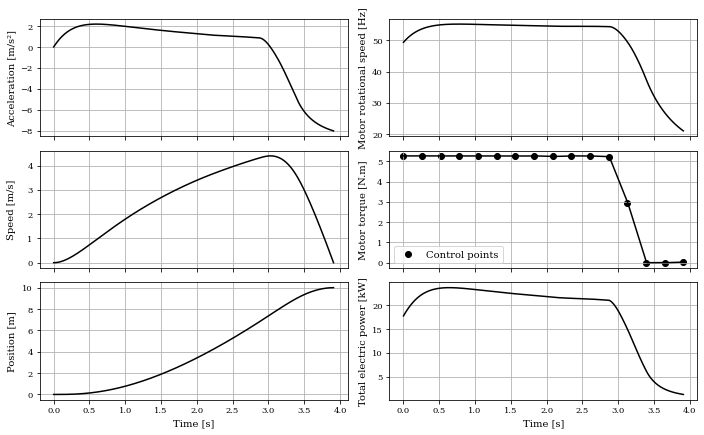

In [15]:
fig = plot_trajectory(optim_problem_trajectory.model.trajectory.trajectory.res, problem=optim_problem_trajectory)

In [16]:
fig.savefig("trajectory_optimization_openmdao.pdf")

In [17]:
api.optimization_viewer(TRAJECTORY_CONFIGURATION_FILE)

In [18]:
TRAJECTORY_OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_outputs_trajectory.xml')
shutil.copy(OUTPUT_FILE, TRAJECTORY_OUTPUT_FILE)

'workdir\\problem_outputs_trajectory.xml'

In [19]:
api.variable_viewer(TRAJECTORY_OUTPUT_FILE)

## 3 - Trajectory and design optimization of the multirotor

In [20]:
api.generate_inputs(CO_DESIGN_CONFIGURATION_FILE, REF_INPUT_FILE, overwrite=True)

INFO    : Problem inputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\workdir\problem_inputs.xml


In [21]:
INPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_inputs.xml')
api.variable_viewer(INPUT_FILE)

In [22]:
api.optimization_viewer(CO_DESIGN_CONFIGURATION_FILE)

In [23]:
optim_problem_trajectory_design = api.optimize_problem(CO_DESIGN_CONFIGURATION_FILE, overwrite=True)

Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.018970599999988735 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.018788400000005367 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.02390059999999039 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01879890000000728 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.025922800000017787 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01980109999999513 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019815899999997555 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.01980979999999022 seconds.
Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.019447

Simulation interval    : 0.0 - 5.358436299722397 seconds.
Elapsed simulation time: 0.022776499999991984 seconds.
Simulation interval    : 0.0 - 5.358436299722397 seconds.
Elapsed simulation time: 0.025838600000014367 seconds.
Simulation interval    : 0.0 - 5.358436299722397 seconds.
Elapsed simulation time: 0.02166299999998955 seconds.
Simulation interval    : 0.0 - 5.88467984551174 seconds.
Elapsed simulation time: 0.02016670000000431 seconds.
Simulation interval    : 0.0 - 5.88467984551174 seconds.
Elapsed simulation time: 0.022860199999996667 seconds.
Simulation interval    : 0.0 - 5.88467984551174 seconds.
Elapsed simulation time: 0.019231399999995347 seconds.
Simulation interval    : 0.0 - 5.88467984551174 seconds.
Elapsed simulation time: 0.020048199999990857 seconds.
Simulation interval    : 0.0 - 5.88467984551174 seconds.
Elapsed simulation time: 0.021890000000013288 seconds.
Simulation interval    : 0.0 - 5.88467984551174 seconds.
Elapsed simulation time: 0.01970330000000331 s

Simulation interval    : 0.0 - 4.179604805960232 seconds.
Elapsed simulation time: 0.01996070000001282 seconds.
Simulation interval    : 0.0 - 4.179604805960232 seconds.
Elapsed simulation time: 0.019400599999983115 seconds.
Simulation interval    : 0.0 - 4.179604805960232 seconds.
Elapsed simulation time: 0.01904730000001109 seconds.
Simulation interval    : 0.0 - 4.179604805960232 seconds.
Elapsed simulation time: 0.019486400000005233 seconds.
Simulation interval    : 0.0 - 4.179604805960232 seconds.
Elapsed simulation time: 0.01869130000000041 seconds.
Simulation interval    : 0.0 - 4.179604805960232 seconds.
Elapsed simulation time: 0.018718200000023444 seconds.
Simulation interval    : 0.0 - 4.179604805960232 seconds.
Elapsed simulation time: 0.0181479999999965 seconds.
Simulation interval    : 0.0 - 2.9687420645258937 seconds.
Elapsed simulation time: 0.018553900000000567 seconds.
Simulation interval    : 0.0 - 2.9687420645258937 seconds.
Elapsed simulation time: 0.01910619999998

Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.01883149999997613 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.02048590000001127 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.01959959999999228 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.02197140000001241 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.020219400000001997 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.022577299999994693 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.019081300000010515 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.02134060000000204 seconds.
Simulation interval    : 0.0 - 2.9253764297837144 seconds.
Elapsed simulation time: 0.0189316

Simulation interval    : 0.0 - 2.866521633317313 seconds.
Elapsed simulation time: 0.019087000000013177 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.022328799999996818 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.01983549999999923 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.019231099999984735 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.019279399999987845 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.01891620000000671 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.01876530000001253 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.019331199999982118 seconds.
Simulation interval    : 0.0 - 2.8665206333173123 seconds.
Elapsed simulation time: 0.022677

Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.01896170000000552 seconds.
Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.01880990000000793 seconds.
Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.019870199999985516 seconds.
Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.01858419999999228 seconds.
Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.018446199999999635 seconds.
Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.019337899999982255 seconds.
Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.020380899999992153 seconds.
Simulation interval    : 0.0 - 2.9081475920871642 seconds.
Elapsed simulation time: 0.018738100000007307 seconds.
Simulation interval    : 0.0 - 2.9081485920871644 seconds.
Elapsed simulation time: 0.01875

Simulation interval    : 0.0 - 2.8790945088694175 seconds.
Elapsed simulation time: 0.018761699999998882 seconds.
Simulation interval    : 0.0 - 2.8790945088694175 seconds.
Elapsed simulation time: 0.020604199999979755 seconds.
Simulation interval    : 0.0 - 2.8790945088694175 seconds.
Elapsed simulation time: 0.02944239999999354 seconds.
Simulation interval    : 0.0 - 2.8790945088694175 seconds.
Elapsed simulation time: 0.02089360000002216 seconds.
Simulation interval    : 0.0 - 2.8790945088694175 seconds.
Elapsed simulation time: 0.01933209999998553 seconds.
Simulation interval    : 0.0 - 2.8790945088694175 seconds.
Elapsed simulation time: 0.019227600000021994 seconds.
Simulation interval    : 0.0 - 2.8680649231404836 seconds.
Elapsed simulation time: 0.022489699999994173 seconds.
Simulation interval    : 0.0 - 2.8680649231404836 seconds.
Elapsed simulation time: 0.020500999999995884 seconds.
Simulation interval    : 0.0 - 2.8680649231404836 seconds.
Elapsed simulation time: 0.02070

Elapsed simulation time: 0.018815700000004654 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.02270319999999515 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.02029910000001678 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.020750700000007782 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.018798599999996668 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.01962360000001695 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.018445700000000897 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.018412599999976464 seconds.
Simulation interval    : 0.0 - 2.816970891230526 seconds.
Elapsed simulation time: 0.019704799999999523 seconds.
Simulation interval    : 0.0 - 2.81697089123

Simulation interval    : 0.0 - 2.8276107188634096 seconds.
Elapsed simulation time: 0.018957899999975325 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.018410500000015873 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.019063499999987243 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.019609700000017938 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.018669699999975364 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.019925999999998112 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.01875799999999117 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.01887699999997494 seconds.
Simulation interval    : 0.0 - 2.827609718863409 seconds.
Elapsed simulation time: 0.018950799999

Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.022566900000015266 seconds.
Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.01901310000002354 seconds.
Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.020194000000003598 seconds.
Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.019898099999977603 seconds.
Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.01998810000000617 seconds.
Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.02009749999999144 seconds.
Simulation interval    : 0.0 - 2.828536386033702 seconds.
Elapsed simulation time: 0.01924790000001053 seconds.
Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.0206924000000015 seconds.
Simulation interval    : 0.0 - 2.8285353860337015 seconds.
Elapsed simulation time: 0.019523099

Simulation interval    : 0.0 - 2.8302818315939207 seconds.
Elapsed simulation time: 0.01962929999999119 seconds.
Simulation interval    : 0.0 - 2.8302818315939207 seconds.
Elapsed simulation time: 0.019122599999974454 seconds.
Simulation interval    : 0.0 - 2.8302818315939207 seconds.
Elapsed simulation time: 0.01895690000000627 seconds.
Simulation interval    : 0.0 - 2.8302818315939207 seconds.
Elapsed simulation time: 0.021257000000019843 seconds.
Simulation interval    : 0.0 - 2.8346755787970324 seconds.
Elapsed simulation time: 0.0201635999999894 seconds.
Simulation interval    : 0.0 - 2.8346755787970324 seconds.
Elapsed simulation time: 0.018856200000016088 seconds.
Simulation interval    : 0.0 - 2.8346755787970324 seconds.
Elapsed simulation time: 0.020602999999994154 seconds.
Simulation interval    : 0.0 - 2.8346755787970324 seconds.
Elapsed simulation time: 0.018550399999980982 seconds.
Simulation interval    : 0.0 - 2.8346755787970324 seconds.
Elapsed simulation time: 0.018456

Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.03843549999999141 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.019366199999979017 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.01956370000002039 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.018895700000001625 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.02600280000001476 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.021354900000005728 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.018691999999987274 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.0192023999999833 seconds.
Simulation interval    : 0.0 - 2.8408188896994813 seconds.
Elapsed simulation time: 0.0211214

Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.01876839999999902 seconds.
Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.019450100000000248 seconds.
Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.018608999999997877 seconds.
Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.020515200000005507 seconds.
Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.018958900000001222 seconds.
Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.01972190000000751 seconds.
Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.01832229999999413 seconds.
Simulation interval    : 0.0 - 2.843754240159302 seconds.
Elapsed simulation time: 0.023821400000002768 seconds.
Simulation interval    : 0.0 - 2.8437532401593018 seconds.
Elapsed simulation time: 0.019336

Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.022666800000024523 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.023005299999994122 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.020829300000002604 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.022016299999989997 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.021371299999998428 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.018797699999993256 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.019412999999985914 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.021804400000007718 seconds.
Simulation interval    : 0.0 - 2.843959691572933 seconds.
Elapsed simulation time: 0.02081859999

Simulation interval    : 0.0 - 2.843959789429117 seconds.
Elapsed simulation time: 0.019664400000010573 seconds.
Simulation interval    : 0.0 - 2.843959789429117 seconds.
Elapsed simulation time: 0.025645800000006602 seconds.
Simulation interval    : 0.0 - 2.843959789429117 seconds.
Elapsed simulation time: 0.022091899999992393 seconds.
Simulation interval    : 0.0 - 2.843959789429117 seconds.
Elapsed simulation time: 0.026780599999995047 seconds.
Simulation interval    : 0.0 - 3.1378750870250984 seconds.
Elapsed simulation time: 0.021565600000002405 seconds.
Simulation interval    : 0.0 - 2.8733513191887154 seconds.
Elapsed simulation time: 0.029955200000017612 seconds.
Simulation interval    : 0.0 - 2.8474565581557374 seconds.
Elapsed simulation time: 0.019187899999991487 seconds.
Simulation interval    : 0.0 - 2.844385359214453 seconds.
Elapsed simulation time: 0.01878990000000158 seconds.
Simulation interval    : 0.0 - 2.8440117344617253 seconds.
Elapsed simulation time: 0.01917799

Simulation interval    : 0.0 - 2.843864875545345 seconds.
Elapsed simulation time: 0.022131599999994478 seconds.
Simulation interval    : 0.0 - 2.8439351126108914 seconds.
Elapsed simulation time: 0.01885179999999309 seconds.
Simulation interval    : 0.0 - 2.843953402368321 seconds.
Elapsed simulation time: 0.02214749999998844 seconds.
Simulation interval    : 0.0 - 2.8439581703103323 seconds.
Elapsed simulation time: 0.019361899999978505 seconds.
Simulation interval    : 0.0 - 2.8439594136186015 seconds.
Elapsed simulation time: 0.019275399999997944 seconds.
Simulation interval    : 0.0 - 2.843959737848246 seconds.
Elapsed simulation time: 0.019097700000003215 seconds.
Simulation interval    : 0.0 - 2.843959822383128 seconds.
Elapsed simulation time: 0.021392499999990378 seconds.
Simulation interval    : 0.0 - 2.8439598443438014 seconds.
Elapsed simulation time: 0.022267999999996846 seconds.
Simulation interval    : 0.0 - 2.8439598496323275 seconds.
Elapsed simulation time: 0.01989779

Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.01903570000001764 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.019346600000005765 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.01903740000000198 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.019141999999988002 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.019808000000011816 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.023035399999997708 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.018816799999996192 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.024018599999976686 seconds.
Simulation interval    : 0.0 - 2.8561423446743452 seconds.
Elapsed simulation time: 0.0190

Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.018790400000000318 seconds.
Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.019259900000008656 seconds.
Simulation interval    : 0.0 - 2.8589331732958265 seconds.
Elapsed simulation time: 0.019191000000006397 seconds.
Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.02760169999999107 seconds.
Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.021339899999986756 seconds.
Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.018635599999981878 seconds.
Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.01838610000001495 seconds.
Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.019680300000004536 seconds.
Simulation interval    : 0.0 - 2.8589321732958264 seconds.
Elapsed simulation time: 0.0189

Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.018442500000020345 seconds.
Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.018880499999994527 seconds.
Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.027505599999983588 seconds.
Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.018979900000005046 seconds.
Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.01881509999998343 seconds.
Simulation interval    : 0.0 - 2.882177196138153 seconds.
Elapsed simulation time: 0.018787800000012567 seconds.
Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.019510999999994283 seconds.
Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.03911170000000652 seconds.
Simulation interval    : 0.0 - 2.8821761961381522 seconds.
Elapsed simulation time: 0.01919

Simulation interval    : 0.0 - 2.9135493839469397 seconds.
Elapsed simulation time: 0.01843759999999861 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.01971490000002518 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.01970890000001191 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.01842740000000731 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.018661199999996825 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.01852880000001278 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.018296499999991056 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.018760100000008606 seconds.
Simulation interval    : 0.0 - 2.89593386374217 seconds.
Elapsed simulation time: 0.01869270000000256 secon

Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.020736400000004096 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.020264300000008006 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.02084189999999353 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.01889070000001425 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.02020310000000336 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.019062300000001642 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.021486199999998234 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.01924790000001053 seconds.
Simulation interval    : 0.0 - 2.8998030279164198 seconds.
Elapsed simulation time: 0.019097

Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.028564700000003995 seconds.
Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.021152199999988852 seconds.
Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.02311599999998748 seconds.
Simulation interval    : 0.0 - 2.900650484337467 seconds.
Elapsed simulation time: 0.026609100000001717 seconds.
Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.02338349999999423 seconds.
Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.019376200000010613 seconds.
Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.020382599999976492 seconds.
Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.019635899999997264 seconds.
Simulation interval    : 0.0 - 2.900649484337467 seconds.
Elapsed simulation time: 0.0201833000000

Simulation interval    : 0.0 - 2.90120346427293 seconds.
Elapsed simulation time: 0.027458500000022923 seconds.
Simulation interval    : 0.0 - 2.9285983208498254 seconds.
Elapsed simulation time: 0.02428059999999732 seconds.
Simulation interval    : 0.0 - 2.9039429499306193 seconds.
Elapsed simulation time: 0.027568000000002257 seconds.
Simulation interval    : 0.0 - 2.9014774128386986 seconds.
Elapsed simulation time: 0.03031820000001062 seconds.
Simulation interval    : 0.0 - 2.901230859129507 seconds.
Elapsed simulation time: 0.028540700000007746 seconds.
Simulation interval    : 0.0 - 2.901230859129507 seconds.
Elapsed simulation time: 0.01926649999998631 seconds.
Simulation interval    : 0.0 - 2.901230859129507 seconds.
Elapsed simulation time: 0.018731900000005908 seconds.
Simulation interval    : 0.0 - 2.901230859129507 seconds.
Elapsed simulation time: 0.018965199999996685 seconds.
Simulation interval    : 0.0 - 2.901230859129507 seconds.
Elapsed simulation time: 0.019794300000

Simulation interval    : 0.0 - 2.9012374460552555 seconds.
Elapsed simulation time: 0.018624100000010912 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.019964500000014596 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.023492200000021057 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.01885880000000384 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.018618200000020124 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.018338199999988092 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.019207100000016908 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.020299500000021453 seconds.
Simulation interval    : 0.0 - 2.9012364460552553 seconds.
Elapsed simulation time: 0.022

Simulation interval    : 0.0 - 2.9012416570957593 seconds.
Elapsed simulation time: 0.020657799999980853 seconds.
Simulation interval    : 0.0 - 2.9012416570957593 seconds.
Elapsed simulation time: 0.0246755999999948 seconds.
Simulation interval    : 0.0 - 2.9012416570957593 seconds.
Elapsed simulation time: 0.018902400000001762 seconds.
Simulation interval    : 0.0 - 2.9012416570957593 seconds.
Elapsed simulation time: 0.02103660000000218 seconds.
Simulation interval    : 0.0 - 2.923890058802075 seconds.
Elapsed simulation time: 0.020907899999997426 seconds.
Simulation interval    : 0.0 - 2.903506497266391 seconds.
Elapsed simulation time: 0.01885680000000889 seconds.
Simulation interval    : 0.0 - 2.9014681411128223 seconds.
Elapsed simulation time: 0.023937799999998788 seconds.
Simulation interval    : 0.0 - 2.901264305497466 seconds.
Elapsed simulation time: 0.018911799999983714 seconds.
Simulation interval    : 0.0 - 2.90124392193593 seconds.
Elapsed simulation time: 0.01907260000

Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.025187000000016724 seconds.
Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.020464899999979025 seconds.
Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.019415499999979602 seconds.
Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.023943900000006124 seconds.
Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.019197499999989986 seconds.
Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.020992300000017394 seconds.
Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.019226800000012645 seconds.
Simulation interval    : 0.0 - 2.901241966825249 seconds.
Elapsed simulation time: 0.01829290000000583 seconds.
Simulation interval    : 0.0 - 2.901242966825249 seconds.
Elapsed simulation time: 0.019414000000

Simulation interval    : 0.0 - 2.901243018460195 seconds.
Elapsed simulation time: 0.018736000000018294 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.027269699999976638 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.030209899999988465 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.019237399999980198 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.018467399999991585 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.01925839999998402 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.01847739999999476 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.020491999999990185 seconds.
Simulation interval    : 0.0 - 2.9012420184601946 seconds.
Elapsed simulation time: 0.01952

Elapsed simulation time: 0.018718799999987823 seconds.
Simulation interval    : 0.0 - 2.9012420520852658 seconds.
Elapsed simulation time: 0.018947400000001835 seconds.
Simulation interval    : 0.0 - 2.9012420520852658 seconds.
Elapsed simulation time: 0.023067700000012792 seconds.
Simulation interval    : 0.0 - 2.9012420520852658 seconds.
Elapsed simulation time: 0.01843300000001591 seconds.
Simulation interval    : 0.0 - 2.9012420520852658 seconds.
Elapsed simulation time: 0.03704899999999611 seconds.
Simulation interval    : 0.0 - 2.9012420520852658 seconds.
Elapsed simulation time: 0.018997399999989284 seconds.
Simulation interval    : 0.0 - 2.9012420520852658 seconds.
Elapsed simulation time: 0.0189000999999962 seconds.
Simulation interval    : 0.0 - 2.9181950917162864 seconds.
Elapsed simulation time: 0.018370400000009113 seconds.
Simulation interval    : 0.0 - 2.9029373560483687 seconds.
Elapsed simulation time: 0.019199200000002747 seconds.
Simulation interval    : 0.0 - 2.9014

Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.020847700000018676 seconds.
Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.018720299999984036 seconds.
Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.019057600000024877 seconds.
Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.018552400000004354 seconds.
Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.021661599999987402 seconds.
Simulation interval    : 0.0 - 2.9006186457103746 seconds.
Elapsed simulation time: 0.020614800000004152 seconds.
Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.01967559999999935 seconds.
Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.01917329999997719 seconds.
Simulation interval    : 0.0 - 2.900617645710374 seconds.
Elapsed simulation time: 0.018896099999

Simulation interval    : 0.0 - 2.9003733887975254 seconds.
Elapsed simulation time: 0.018693399999989424 seconds.
Simulation interval    : 0.0 - 2.9003733887975254 seconds.
Elapsed simulation time: 0.01973040000001447 seconds.
Simulation interval    : 0.0 - 2.9003733887975254 seconds.
Elapsed simulation time: 0.01943180000000666 seconds.
Simulation interval    : 0.0 - 2.9003733887975254 seconds.
Elapsed simulation time: 0.02001320000002238 seconds.
Simulation interval    : 0.0 - 2.9003733887975254 seconds.
Elapsed simulation time: 0.02152449999999817 seconds.
Simulation interval    : 0.0 - 2.896482660924649 seconds.
Elapsed simulation time: 0.020629299999995965 seconds.
Simulation interval    : 0.0 - 2.8994771156288075 seconds.
Elapsed simulation time: 0.02022170000000756 seconds.
Simulation interval    : 0.0 - 2.900158153446235 seconds.
Elapsed simulation time: 0.01938719999998284 seconds.
Simulation interval    : 0.0 - 2.9003209294682604 seconds.
Elapsed simulation time: 0.0189340999

Simulation interval    : 0.0 - 2.899117550218077 seconds.
Elapsed simulation time: 0.01838420000001406 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.020190200000001823 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.020267399999994495 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.019076299999994717 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.01875310000002628 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.018888299999986202 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.021303999999986445 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.020874300000002677 seconds.
Simulation interval    : 0.0 - 2.8991165502180767 seconds.
Elapsed simulation time: 0.01946

Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.01978719999999612 seconds.
Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.021583199999980707 seconds.
Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.020272200000022167 seconds.
Simulation interval    : 0.0 - 2.893230888792787 seconds.
Elapsed simulation time: 0.01933269999997833 seconds.
Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.018902700000012373 seconds.
Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.018614799999994602 seconds.
Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.018437199999993936 seconds.
Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.01873059999999782 seconds.
Simulation interval    : 0.0 - 2.8932298887927863 seconds.
Elapsed simulation time: 0.018472

Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.019341499999995904 seconds.
Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.01937639999999874 seconds.
Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.02333949999999163 seconds.
Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.019036400000004505 seconds.
Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.019599800000008827 seconds.
Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.018894600000010087 seconds.
Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.0186971999999912 seconds.
Simulation interval    : 0.0 - 2.8922620992865364 seconds.
Elapsed simulation time: 0.020985599999988835 seconds.
Simulation interval    : 0.0 - 2.8922630992865366 seconds.
Elapsed simulation time: 0.018964

Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.018971399999998084 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.018994300000002795 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.02144680000000676 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.026470399999993788 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.0201432000000068 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.01913769999998749 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.019194300000009434 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.018582000000009202 seconds.
Simulation interval    : 0.0 - 2.890106379250083 seconds.
Elapsed simulation time: 0.018952299999995

Simulation interval    : 0.0 - 2.8899100910628404 seconds.
Elapsed simulation time: 0.019131599999980153 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.021472899999992023 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.036745099999990316 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.01897519999999986 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.020094400000004953 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.01881729999999493 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.021460799999999836 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.018898199999995313 seconds.
Simulation interval    : 0.0 - 2.8894672970346638 seconds.
Elapsed simulation time: 0.0186

Simulation interval    : 0.0 - 2.876435734872849 seconds.
Elapsed simulation time: 0.0292016000000217 seconds.
Simulation interval    : 0.0 - 2.876435734872849 seconds.
Elapsed simulation time: 0.018902800000006437 seconds.
Simulation interval    : 0.0 - 2.876435734872849 seconds.
Elapsed simulation time: 0.018905399999994188 seconds.
Simulation interval    : 0.0 - 2.876435734872849 seconds.
Elapsed simulation time: 0.0196617999999944 seconds.
Simulation interval    : 0.0 - 2.876435734872849 seconds.
Elapsed simulation time: 0.019449500000007447 seconds.
Simulation interval    : 0.0 - 2.8670058988525655 seconds.
Elapsed simulation time: 0.019634800000005725 seconds.
Simulation interval    : 0.0 - 2.8754927512708206 seconds.
Elapsed simulation time: 0.021629700000005414 seconds.
Simulation interval    : 0.0 - 2.8754927512708206 seconds.
Elapsed simulation time: 0.022058899999990444 seconds.
Simulation interval    : 0.0 - 2.8754927512708206 seconds.
Elapsed simulation time: 0.02400929999

Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.019529399999981933 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.021299499999997806 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.019185899999996536 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.01871810000000096 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.019722599999994372 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.02218869999998674 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.01924390000002063 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.019437300000021196 seconds.
Simulation interval    : 0.0 - 2.8745331259619156 seconds.
Elapsed simulation time: 0.02058

Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.018981000000025006 seconds.
Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.019176000000015847 seconds.
Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.018514199999998482 seconds.
Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.018565499999994017 seconds.
Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.019270000000005894 seconds.
Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.01905659999999898 seconds.
Simulation interval    : 0.0 - 2.8730175034984757 seconds.
Elapsed simulation time: 0.01901700000001938 seconds.
Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.020337100000006103 seconds.
Simulation interval    : 0.0 - 2.8730165034984756 seconds.
Elapsed simulation time: 0.0214

Simulation interval    : 0.0 - 2.872014838204973 seconds.
Elapsed simulation time: 0.019306400000004942 seconds.
Simulation interval    : 0.0 - 2.872014838204973 seconds.
Elapsed simulation time: 0.019790199999988545 seconds.
Simulation interval    : 0.0 - 2.872014838204973 seconds.
Elapsed simulation time: 0.0223345000000279 seconds.
Simulation interval    : 0.0 - 2.872014838204973 seconds.
Elapsed simulation time: 0.023290099999996983 seconds.
Simulation interval    : 0.0 - 2.8228145111062943 seconds.
Elapsed simulation time: 0.018891400000001113 seconds.
Simulation interval    : 0.0 - 2.8670948054951046 seconds.
Elapsed simulation time: 0.01871020000001522 seconds.
Simulation interval    : 0.0 - 2.871522834933986 seconds.
Elapsed simulation time: 0.02292780000001926 seconds.
Simulation interval    : 0.0 - 2.8719656378778744 seconds.
Elapsed simulation time: 0.019462200000020857 seconds.
Simulation interval    : 0.0 - 2.8719656378778744 seconds.
Elapsed simulation time: 0.01942429999

Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.019359299999990753 seconds.
Simulation interval    : 0.0 - 2.8718687200655557 seconds.
Elapsed simulation time: 0.020143899999993664 seconds.
Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.01917219999998565 seconds.
Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.01948179999999411 seconds.
Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.019020800000021154 seconds.
Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.018821600000023864 seconds.
Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.01913850000002526 seconds.
Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.021194100000002436 seconds.
Simulation interval    : 0.0 - 2.8718677200655556 seconds.
Elapsed simulation time: 0.01958

Simulation interval    : 0.0 - 2.871770451762607 seconds.
Elapsed simulation time: 0.02337819999999624 seconds.
Simulation interval    : 0.0 - 2.871770451762607 seconds.
Elapsed simulation time: 0.027046499999983098 seconds.
Simulation interval    : 0.0 - 2.871770451762607 seconds.
Elapsed simulation time: 0.020158299999991414 seconds.
Simulation interval    : 0.0 - 2.8233835321621235 seconds.
Elapsed simulation time: 0.019111500000008164 seconds.
Simulation interval    : 0.0 - 2.8669317598025588 seconds.
Elapsed simulation time: 0.019419800000008536 seconds.
Simulation interval    : 0.0 - 2.871286582566602 seconds.
Elapsed simulation time: 0.019128300000005538 seconds.
Simulation interval    : 0.0 - 2.871722064843007 seconds.
Elapsed simulation time: 0.019986899999992147 seconds.
Simulation interval    : 0.0 - 2.871722064843007 seconds.
Elapsed simulation time: 0.019190100000002985 seconds.
Simulation interval    : 0.0 - 2.871722064843007 seconds.
Elapsed simulation time: 0.0183549999

Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.023240500000014208 seconds.
Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.0191402000000096 seconds.
Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.030145200000021077 seconds.
Simulation interval    : 0.0 - 2.871714863029308 seconds.
Elapsed simulation time: 0.038495600000004515 seconds.
Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.019760400000023992 seconds.
Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.018900500000000875 seconds.
Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.019908900000018548 seconds.
Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.020084600000018327 seconds.
Simulation interval    : 0.0 - 2.8717138630293078 seconds.
Elapsed simulation time: 0.02473

Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.027185400000007576 seconds.
Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.020716100000015558 seconds.
Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.01885010000000875 seconds.
Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.01856580000000463 seconds.
Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.01906700000000683 seconds.
Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.031073699999979 seconds.
Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.02311819999999898 seconds.
Simulation interval    : 0.0 - 2.871708581031321 seconds.
Elapsed simulation time: 0.022230400000012196 seconds.
Simulation interval    : 0.0 - 2.8639944297971924 seconds.
Elapsed simulation time: 0.02107799999998860

Simulation interval    : 0.0 - 2.871234848762568 seconds.
Elapsed simulation time: 0.018777000000000044 seconds.
Simulation interval    : 0.0 - 2.8716604778944865 seconds.
Elapsed simulation time: 0.01974910000001273 seconds.
Simulation interval    : 0.0 - 2.8717030408076787 seconds.
Elapsed simulation time: 0.020290899999992007 seconds.
Simulation interval    : 0.0 - 2.8717072970989976 seconds.
Elapsed simulation time: 0.020214199999998073 seconds.
Simulation interval    : 0.0 - 2.871707722728129 seconds.
Elapsed simulation time: 0.018966099999971675 seconds.
Simulation interval    : 0.0 - 2.871707722728129 seconds.
Elapsed simulation time: 0.022720200000037494 seconds.
Simulation interval    : 0.0 - 2.871707722728129 seconds.
Elapsed simulation time: 0.018843199999992066 seconds.
Simulation interval    : 0.0 - 2.871707722728129 seconds.
Elapsed simulation time: 0.01950320000003103 seconds.
Simulation interval    : 0.0 - 2.871707722728129 seconds.
Elapsed simulation time: 0.0227905999

Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.019928000000049906 seconds.
Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.02338919999999689 seconds.
Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.022204900000019734 seconds.
Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.021459999999990487 seconds.
Simulation interval    : 0.0 - 2.8717086475568085 seconds.
Elapsed simulation time: 0.01951059999998961 seconds.
Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.020864099999982955 seconds.
Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.018645300000002862 seconds.
Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.01985139999999319 seconds.
Simulation interval    : 0.0 - 2.871707647556809 seconds.
Elapsed simulation time: 0.0210523999999

Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.01912270000002536 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.01906900000000178 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.01859669999998914 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.02113259999998718 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.019002999999997883 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.020361400000012964 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.018514500000037515 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.02127810000001773 seconds.
Simulation interval    : 0.0 - 2.871707555056557 seconds.
Elapsed simulation time: 0.0185479999999529

Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.019527900000014142 seconds.
Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.01901140000001078 seconds.
Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.019018599999981234 seconds.
Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.020035699999993994 seconds.
Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.02123060000002397 seconds.
Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.01928570000001173 seconds.
Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.018888200000048982 seconds.
Simulation interval    : 0.0 - 2.863736050160329 seconds.
Elapsed simulation time: 0.0206218000000149 seconds.
Simulation interval    : 0.0 - 2.8637370501603288 seconds.
Elapsed simulation time: 0.019265700000005

Simulation interval    : 0.0 - 2.8563546091470164 seconds.
Elapsed simulation time: 0.019421100000045044 seconds.
Simulation interval    : 0.0 - 2.8563546091470164 seconds.
Elapsed simulation time: 0.019482700000025943 seconds.
Simulation interval    : 0.0 - 2.8563546091470164 seconds.
Elapsed simulation time: 0.02089669999998023 seconds.
Simulation interval    : 0.0 - 2.8563546091470164 seconds.
Elapsed simulation time: 0.019045500000004267 seconds.
Simulation interval    : 0.0 - 2.8563546091470164 seconds.
Elapsed simulation time: 0.019663400000013098 seconds.
Simulation interval    : 0.0 - 2.8249193719384533 seconds.
Elapsed simulation time: 0.021871099999998478 seconds.
Simulation interval    : 0.0 - 2.85321108542616 seconds.
Elapsed simulation time: 0.02201639999998406 seconds.
Simulation interval    : 0.0 - 2.85321108542616 seconds.
Elapsed simulation time: 0.026849499999968884 seconds.
Simulation interval    : 0.0 - 2.85321108542616 seconds.
Elapsed simulation time: 0.0225985999

Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.019780599999990045 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.02010539999997718 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.019401399999992464 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.020677399999954105 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.019697899999982837 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.020654199999967204 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.02239540000005036 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.02208619999998973 seconds.
Simulation interval    : 0.0 - 2.8478585214219585 seconds.
Elapsed simulation time: 0.02554

Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.022685800000033396 seconds.
Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.01912950000001956 seconds.
Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.018613200000004326 seconds.
Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.018795699999998305 seconds.
Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.018744599999990896 seconds.
Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.02469909999996389 seconds.
Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.01919300000002977 seconds.
Simulation interval    : 0.0 - 2.846879180045949 seconds.
Elapsed simulation time: 0.018640800000014224 seconds.
Simulation interval    : 0.0 - 2.846878180045949 seconds.
Elapsed simulation time: 0.01879639999998

Simulation interval    : 0.0 - 2.846468377931777 seconds.
Elapsed simulation time: 0.02128549999997631 seconds.
Simulation interval    : 0.0 - 2.846468377931777 seconds.
Elapsed simulation time: 0.02081420000001799 seconds.
Simulation interval    : 0.0 - 2.846468377931777 seconds.
Elapsed simulation time: 0.021365000000002965 seconds.
Simulation interval    : 0.0 - 2.827138564708366 seconds.
Elapsed simulation time: 0.020675400000015998 seconds.
Simulation interval    : 0.0 - 2.844535396609436 seconds.
Elapsed simulation time: 0.02036729999997533 seconds.
Simulation interval    : 0.0 - 2.8462750797995433 seconds.
Elapsed simulation time: 0.024446300000022347 seconds.
Simulation interval    : 0.0 - 2.8462750797995433 seconds.
Elapsed simulation time: 0.021123199999976805 seconds.
Simulation interval    : 0.0 - 2.8462750797995433 seconds.
Elapsed simulation time: 0.02348610000001372 seconds.
Simulation interval    : 0.0 - 2.8462750797995433 seconds.
Elapsed simulation time: 0.01907779999

Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.02180449999997336 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.020191999999951804 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.019683399999962603 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.01854270000001179 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.01933779999995977 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.01851890000000367 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.01900999999998021 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.02070009999999911 seconds.
Simulation interval    : 0.0 - 2.8460561417210903 seconds.
Elapsed simulation time: 0.01922220

Simulation interval    : 0.0 - 2.878855911226382 seconds.
Elapsed simulation time: 0.019300299999997605 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.019022000000006756 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.019117499999993015 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.021434999999996762 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.02000029999999242 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.02179910000000973 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.025622699999985343 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.022672000000000025 seconds.
Simulation interval    : 0.0 - 2.8636457330774694 seconds.
Elapsed simulation time: 0.02315

Simulation interval    : 0.0 - 2.851649008041604 seconds.
Elapsed simulation time: 0.01933200000001989 seconds.
Simulation interval    : 0.0 - 2.851649008041604 seconds.
Elapsed simulation time: 0.02462470000000394 seconds.
Simulation interval    : 0.0 - 2.851649008041604 seconds.
Elapsed simulation time: 0.030698400000005677 seconds.
Simulation interval    : 0.0 - 2.851649008041604 seconds.
Elapsed simulation time: 0.019467500000018845 seconds.
Simulation interval    : 0.0 - 2.851649008041604 seconds.
Elapsed simulation time: 0.018597100000022238 seconds.
Simulation interval    : 0.0 - 2.851649008041604 seconds.
Elapsed simulation time: 0.01891729999999825 seconds.
Simulation interval    : 0.0 - 2.851649008041604 seconds.
Elapsed simulation time: 0.018981300000007195 seconds.
Simulation interval    : 0.0 - 2.847489697026104 seconds.
Elapsed simulation time: 0.01900140000003603 seconds.
Simulation interval    : 0.0 - 2.847489697026104 seconds.
Elapsed simulation time: 0.019108400000050

Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.02247740000001386 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.020320800000035888 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.020989600000007158 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.019913699999960954 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.019084399999997004 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.018774000000007618 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.018219099999953414 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.019137899999975616 seconds.
Simulation interval    : 0.0 - 2.847142299432293 seconds.
Elapsed simulation time: 0.019112500000

Simulation interval    : 0.0 - 2.8448757219018765 seconds.
Elapsed simulation time: 0.019536200000004555 seconds.
Simulation interval    : 0.0 - 2.8465733144232055 seconds.
Elapsed simulation time: 0.019736299999976836 seconds.
Simulation interval    : 0.0 - 2.8467430736753383 seconds.
Elapsed simulation time: 0.019313599999975395 seconds.
Simulation interval    : 0.0 - 2.8467430736753383 seconds.
Elapsed simulation time: 0.021232500000053278 seconds.
Simulation interval    : 0.0 - 2.8467430736753383 seconds.
Elapsed simulation time: 0.018727399999988847 seconds.
Simulation interval    : 0.0 - 2.8467430736753383 seconds.
Elapsed simulation time: 0.019458999999983462 seconds.
Simulation interval    : 0.0 - 2.8467430736753383 seconds.
Elapsed simulation time: 0.018884400000047208 seconds.
Simulation interval    : 0.0 - 2.8467430736753383 seconds.
Elapsed simulation time: 0.01869809999999461 seconds.
Simulation interval    : 0.0 - 2.8467430736753383 seconds.
Elapsed simulation time: 0.020

Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.019012199999963286 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.019053199999973458 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.018877800000041134 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.023808099999996557 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.019598599999994804 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.018801599999960672 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.03419059999998808 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.018710999999996147 seconds.
Simulation interval    : 0.0 - 2.846705269110625 seconds.
Elapsed simulation time: 0.018499200000

Simulation interval    : 0.0 - 2.8277580224266563 seconds.
Elapsed simulation time: 0.019581700000003366 seconds.
Simulation interval    : 0.0 - 2.8448071398128643 seconds.
Elapsed simulation time: 0.019787900000039826 seconds.
Simulation interval    : 0.0 - 2.8465120515514855 seconds.
Elapsed simulation time: 0.019785699999999906 seconds.
Simulation interval    : 0.0 - 2.8466825427253473 seconds.
Elapsed simulation time: 0.023343599999975595 seconds.
Simulation interval    : 0.0 - 2.8466995918427336 seconds.
Elapsed simulation time: 0.019351200000016888 seconds.
Simulation interval    : 0.0 - 2.8466995918427336 seconds.
Elapsed simulation time: 0.01964149999997744 seconds.
Simulation interval    : 0.0 - 2.8466995918427336 seconds.
Elapsed simulation time: 0.01900829999999587 seconds.
Simulation interval    : 0.0 - 2.8466995918427336 seconds.
Elapsed simulation time: 0.021828800000037063 seconds.
Simulation interval    : 0.0 - 2.8466995918427336 seconds.
Elapsed simulation time: 0.0200

Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.01942530000002307 seconds.
Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.018865499999947133 seconds.
Simulation interval    : 0.0 - 2.8466981972671093 seconds.
Elapsed simulation time: 0.018859100000042872 seconds.
Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.019424399999991238 seconds.
Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.019590699999980643 seconds.
Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.018664600000022347 seconds.
Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.02090800000001991 seconds.
Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.026996100000019396 seconds.
Simulation interval    : 0.0 - 2.846697197267109 seconds.
Elapsed simulation time: 0.019968599999

Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.020733000000006996 seconds.
Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.02330249999999978 seconds.
Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.025498499999969226 seconds.
Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.027467699999988326 seconds.
Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.019564900000034413 seconds.
Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.018437399999982063 seconds.
Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.019073199999979806 seconds.
Simulation interval    : 0.0 - 2.8466967951185134 seconds.
Elapsed simulation time: 0.01843250000001717 seconds.
Simulation interval    : 0.0 - 2.8358061330647297 seconds.
Elapsed simulation time: 0.0188

Simulation interval    : 0.0 - 2.846507495291586 seconds.
Elapsed simulation time: 0.018948500000021795 seconds.
Simulation interval    : 0.0 - 2.8466775839552185 seconds.
Elapsed simulation time: 0.019633699999985765 seconds.
Simulation interval    : 0.0 - 2.846694592821582 seconds.
Elapsed simulation time: 0.024418299999979354 seconds.
Simulation interval    : 0.0 - 2.8466962937082188 seconds.
Elapsed simulation time: 0.02111769999999069 seconds.
Simulation interval    : 0.0 - 2.8466962937082188 seconds.
Elapsed simulation time: 0.024060899999994945 seconds.
Simulation interval    : 0.0 - 2.8466962937082188 seconds.
Elapsed simulation time: 0.02879339999998365 seconds.
Simulation interval    : 0.0 - 2.8466962937082188 seconds.
Elapsed simulation time: 0.019361300000014126 seconds.
Simulation interval    : 0.0 - 2.8466962937082188 seconds.
Elapsed simulation time: 0.02106399999996711 seconds.
Simulation interval    : 0.0 - 2.8466962937082188 seconds.
Elapsed simulation time: 0.0187861

Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.019126800000037747 seconds.
Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.019328500000028725 seconds.
Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.019788800000014817 seconds.
Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.018984400000022106 seconds.
Simulation interval    : 0.0 - 2.846697246492941 seconds.
Elapsed simulation time: 0.0191515999999865 seconds.
Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.01874639999999772 seconds.
Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.01964599999996608 seconds.
Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.019634300000006988 seconds.
Simulation interval    : 0.0 - 2.846696246492941 seconds.
Elapsed simulation time: 0.024446300000022

Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.019471400000043104 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.021727700000042205 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.020148500000004788 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.018690099999957965 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.020419099999969603 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.021275100000025304 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.0197329999999738 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.01906700000000683 seconds.
Simulation interval    : 0.0 - 2.8466962091742842 seconds.
Elapsed simulation time: 0.02226

Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.02080299999994395 seconds.
Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.022677299999998013 seconds.
Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.020132600000010825 seconds.
Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.0415866999999821 seconds.
Simulation interval    : 0.0 - 2.8462795078969347 seconds.
Elapsed simulation time: 0.020180600000003324 seconds.
Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.020126199999992878 seconds.
Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.018783499999983633 seconds.
Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.019596599999999853 seconds.
Simulation interval    : 0.0 - 2.8462785078969346 seconds.
Elapsed simulation time: 0.02097

Simulation interval    : 0.0 - 2.840710493939911 seconds.
Elapsed simulation time: 0.021560800000031577 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.026446200000009412 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.020010500000012144 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.02317270000003191 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.020602999999994154 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.02263960000004772 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.019968900000037593 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.019818900000018402 seconds.
Simulation interval    : 0.0 - 2.817045986548239 seconds.
Elapsed simulation time: 0.0197710999999

Simulation interval    : 0.0 - 2.8197436480081306 seconds.
Elapsed simulation time: 0.02284730000002355 seconds.
Simulation interval    : 0.0 - 2.8197436480081306 seconds.
Elapsed simulation time: 0.0196849999999813 seconds.
Simulation interval    : 0.0 - 2.8197436480081306 seconds.
Elapsed simulation time: 0.020145399999989877 seconds.
Simulation interval    : 0.0 - 2.8197436480081306 seconds.
Elapsed simulation time: 0.022259900000051402 seconds.
Simulation interval    : 0.0 - 2.8197436480081306 seconds.
Elapsed simulation time: 0.02075680000001512 seconds.
Simulation interval    : 0.0 - 2.8197436480081306 seconds.
Elapsed simulation time: 0.01864669999997659 seconds.
Simulation interval    : 0.0 - 2.8197436480081306 seconds.
Elapsed simulation time: 0.020671100000015485 seconds.
Simulation interval    : 0.0 - 2.8204682165940023 seconds.
Elapsed simulation time: 0.019156699999996363 seconds.
Simulation interval    : 0.0 - 2.8204682165940023 seconds.
Elapsed simulation time: 0.0195598

Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.01912150000003976 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.01887579999998934 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.019727799999998297 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.020943799999997736 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.018864600000028986 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.018928399999992962 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.019428500000003623 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.018742900000006557 seconds.
Simulation interval    : 0.0 - 2.820452764390812 seconds.
Elapsed simulation time: 0.0186099000000

Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.019029299999999694 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.01888829999995778 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.01888819999999214 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.01868309999997564 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.019306200000016815 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.0483932000000209 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.03879599999999073 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.03554319999994959 seconds.
Simulation interval    : 0.0 - 2.8122734026362664 seconds.
Elapsed simulation time: 0.044477699

Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.02161430000001019 seconds.
Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.01929530000001023 seconds.
Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.01950610000000097 seconds.
Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.01855110000002469 seconds.
Simulation interval    : 0.0 - 2.814624384085932 seconds.
Elapsed simulation time: 0.02014409999998179 seconds.
Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.01917350000002216 seconds.
Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.018601799999999002 seconds.
Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.018700799999976425 seconds.
Simulation interval    : 0.0 - 2.814623384085932 seconds.
Elapsed simulation time: 0.02036029999999300

Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.019126700000015262 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.01846810000000687 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.018908699999997225 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.018945799999983137 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.020643399999983103 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.018970200000012483 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.018772000000012667 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.019290400000045338 seconds.
Simulation interval    : 0.0 - 2.803771269129865 seconds.
Elapsed simulation time: 0.019686799999

Simulation interval    : 0.0 - 2.8070016400319235 seconds.
Elapsed simulation time: 0.018644499999993513 seconds.
Simulation interval    : 0.0 - 2.8070016400319235 seconds.
Elapsed simulation time: 0.019001900000034766 seconds.
Simulation interval    : 0.0 - 2.8006042116205854 seconds.
Elapsed simulation time: 0.01922869999998511 seconds.
Simulation interval    : 0.0 - 2.803876202762099 seconds.
Elapsed simulation time: 0.020050999999966734 seconds.
Simulation interval    : 0.0 - 2.8053788169296183 seconds.
Elapsed simulation time: 0.020256000000017593 seconds.
Simulation interval    : 0.0 - 2.8053788169296183 seconds.
Elapsed simulation time: 0.01950610000000097 seconds.
Simulation interval    : 0.0 - 2.8053788169296183 seconds.
Elapsed simulation time: 0.018756400000029316 seconds.
Simulation interval    : 0.0 - 2.8053788169296183 seconds.
Elapsed simulation time: 0.019647200000008525 seconds.
Simulation interval    : 0.0 - 2.8053788169296183 seconds.
Elapsed simulation time: 0.01853

Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.019785900000044876 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.018912600000021484 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.03136419999998452 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.021614900000031412 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.019796000000042113 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.018625400000019 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.018806400000016765 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.019839999999987867 seconds.
Simulation interval    : 0.0 - 2.7978488260781766 seconds.
Elapsed simulation time: 0.019876

Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.018708699999990586 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.020475000000033106 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.022414500000024873 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.020705200000008972 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.021207799999956478 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.019552299999986644 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.02112499999998363 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.018718599999999697 seconds.
Simulation interval    : 0.0 - 2.8009844441603535 seconds.
Elapsed simulation time: 0.019

Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.018971799999974337 seconds.
Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.019682399999965128 seconds.
Simulation interval    : 0.0 - 2.7935988299598122 seconds.
Elapsed simulation time: 0.018637500000011187 seconds.
Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.018395699999985027 seconds.
Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.01922100000001592 seconds.
Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.018819300000018302 seconds.
Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.02112440000001925 seconds.
Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.018868499999996402 seconds.
Simulation interval    : 0.0 - 2.793597829959812 seconds.
Elapsed simulation time: 0.019171900000

Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.018934399999977813 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.019493199999999433 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.018840900000043348 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.01851950000002489 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.019055100000002767 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.020796099999984108 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.018906200000003537 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.018931899999984125 seconds.
Simulation interval    : 0.0 - 2.7935662810879744 seconds.
Elapsed simulation time: 0.018

Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.019887100000005375 seconds.
Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.01871330000000171 seconds.
Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.020819200000005367 seconds.
Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.020825900000033926 seconds.
Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.019053900000017165 seconds.
Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.019601200000010977 seconds.
Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.02110520000002225 seconds.
Simulation interval    : 0.0 - 2.7935553987560744 seconds.
Elapsed simulation time: 0.018651200000022072 seconds.
Simulation interval    : 0.0 - 2.7938392765173 seconds.
Elapsed simulation time: 0.0204804

Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.02129139999999552 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.02090719999995372 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.021427200000005087 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.019009499999981472 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.02133910000003425 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.018795899999986432 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.01847459999999046 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.020266199999980472 seconds.
Simulation interval    : 0.0 - 2.7941585736275942 seconds.
Elapsed simulation time: 0.021887

Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.019897000000014486 seconds.
Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.020875500000045122 seconds.
Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.021144600000013725 seconds.
Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.018528099999969072 seconds.
Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.02199859999996079 seconds.
Simulation interval    : 0.0 - 2.7947364491261735 seconds.
Elapsed simulation time: 0.020818699999949786 seconds.
Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.02186180000001059 seconds.
Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.020447699999976976 seconds.
Simulation interval    : 0.0 - 2.7947354491261733 seconds.
Elapsed simulation time: 0.0209

Simulation interval    : 0.0 - 2.7954769519341505 seconds.
Elapsed simulation time: 0.01862010000002101 seconds.
Simulation interval    : 0.0 - 2.7954769519341505 seconds.
Elapsed simulation time: 0.019384199999990415 seconds.
Simulation interval    : 0.0 - 2.7954769519341505 seconds.
Elapsed simulation time: 0.019741000000010445 seconds.
Simulation interval    : 0.0 - 2.7954769519341505 seconds.
Elapsed simulation time: 0.021845299999995405 seconds.
Simulation interval    : 0.0 - 2.7954769519341505 seconds.
Elapsed simulation time: 0.021507700000029217 seconds.
Simulation interval    : 0.0 - 2.7954769519341505 seconds.
Elapsed simulation time: 0.021081000000037875 seconds.
Simulation interval    : 0.0 - 2.856920892375635 seconds.
Elapsed simulation time: 0.02011690000000499 seconds.
Simulation interval    : 0.0 - 2.801621345978299 seconds.
Elapsed simulation time: 0.020094700000015564 seconds.
Simulation interval    : 0.0 - 2.796091391338565 seconds.
Elapsed simulation time: 0.0194981

Simulation interval    : 0.0 - 2.8117027225869116 seconds.
Elapsed simulation time: 0.01989800000001196 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.022363700000028075 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.02336289999999508 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.021172200000023622 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.021029100000021117 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.019860199999982342 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.02291739999998299 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.020023799999989933 seconds.
Simulation interval    : 0.0 - 2.8117017225869114 seconds.
Elapsed simulation time: 0.02421

Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.019781799999975647 seconds.
Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.021020500000020093 seconds.
Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.01987170000001015 seconds.
Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.019823499999972682 seconds.
Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.01904359999997496 seconds.
Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.02235390000004145 seconds.
Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.022413799999981165 seconds.
Simulation interval    : 0.0 - 2.814496483982443 seconds.
Elapsed simulation time: 0.02218590000001086 seconds.
Simulation interval    : 0.0 - 2.8144954839824425 seconds.
Elapsed simulation time: 0.0192476

Simulation interval    : 0.0 - 2.8380302860751034 seconds.
Elapsed simulation time: 0.019243200000005345 seconds.
Simulation interval    : 0.0 - 2.8380302860751034 seconds.
Elapsed simulation time: 0.019402599999978065 seconds.
Simulation interval    : 0.0 - 2.8380302860751034 seconds.
Elapsed simulation time: 0.0254355000000146 seconds.
Simulation interval    : 0.0 - 2.840648310346995 seconds.
Elapsed simulation time: 0.02055280000001858 seconds.
Simulation interval    : 0.0 - 2.840648310346995 seconds.
Elapsed simulation time: 0.028652800000031675 seconds.
Simulation interval    : 0.0 - 2.840648310346995 seconds.
Elapsed simulation time: 0.018931300000019746 seconds.
Simulation interval    : 0.0 - 2.840648310346995 seconds.
Elapsed simulation time: 0.018825600000013765 seconds.
Simulation interval    : 0.0 - 2.840648310346995 seconds.
Elapsed simulation time: 0.018576699999982793 seconds.
Simulation interval    : 0.0 - 2.840648310346995 seconds.
Elapsed simulation time: 0.01950920000

Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.022380199999986417 seconds.
Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.02196929999996655 seconds.
Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.021753199999977824 seconds.
Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.023563700000011067 seconds.
Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.01978520000000117 seconds.
Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.02189600000002656 seconds.
Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.019219900000052803 seconds.
Simulation interval    : 0.0 - 2.8432125138427202 seconds.
Elapsed simulation time: 0.019398600000045008 seconds.
Simulation interval    : 0.0 - 2.8525618066002254 seconds.
Elapsed simulation time: 0.01973

Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.01968859999999495 seconds.
Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.020285499999999956 seconds.
Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.03163470000004054 seconds.
Simulation interval    : 0.0 - 2.8436600547463593 seconds.
Elapsed simulation time: 0.021090000000015152 seconds.
Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.021149199999968005 seconds.
Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.039611800000045605 seconds.
Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.019496100000026217 seconds.
Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.02015729999999394 seconds.
Simulation interval    : 0.0 - 2.8436590547463596 seconds.
Elapsed simulation time: 0.01937

Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.019740200000001096 seconds.
Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.02078599999998687 seconds.
Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.023283600000013394 seconds.
Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.01968019999998205 seconds.
Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.018673100000000886 seconds.
Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.02499599999998736 seconds.
Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.022464399999989837 seconds.
Simulation interval    : 0.0 - 2.8400355394090306 seconds.
Elapsed simulation time: 0.024150600000041322 seconds.
Simulation interval    : 0.0 - 2.8400365394090303 seconds.
Elapsed simulation time: 0.01898

Simulation interval    : 0.0 - 2.844072318390613 seconds.
Elapsed simulation time: 0.033583800000030806 seconds.
Simulation interval    : 0.0 - 2.844072318390613 seconds.
Elapsed simulation time: 0.03542179999999462 seconds.
Simulation interval    : 0.0 - 2.844072318390613 seconds.
Elapsed simulation time: 0.021304799999995794 seconds.
Simulation interval    : 0.0 - 2.844072318390613 seconds.
Elapsed simulation time: 0.030683799999962957 seconds.
Simulation interval    : 0.0 - 2.8524010057966827 seconds.
Elapsed simulation time: 0.01851419999997006 seconds.
Simulation interval    : 0.0 - 2.8524010057966827 seconds.
Elapsed simulation time: 0.02054160000000138 seconds.
Simulation interval    : 0.0 - 2.8524010057966827 seconds.
Elapsed simulation time: 0.018842300000017076 seconds.
Simulation interval    : 0.0 - 2.8524010057966827 seconds.
Elapsed simulation time: 0.01869419999997035 seconds.
Simulation interval    : 0.0 - 2.8524010057966827 seconds.
Elapsed simulation time: 0.0189144999

Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.018365799999969568 seconds.
Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.021546399999976984 seconds.
Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.018885800000020936 seconds.
Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.019781499999965035 seconds.
Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.018583400000011352 seconds.
Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.019027100000016617 seconds.
Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.019014900000001944 seconds.
Simulation interval    : 0.0 - 2.8609415193523633 seconds.
Elapsed simulation time: 0.019146500000033484 seconds.
Simulation interval    : 0.0 - 2.8607141843657327 seconds.
Elapsed simulation time: 0.02

Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.0183683000000201 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.020627999999987878 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.02069050000000061 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.0188017999999488 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.019066600000030576 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.01901220000002013 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.018638099999975566 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.018424499999980526 seconds.
Simulation interval    : 0.0 - 2.859768872726841 seconds.
Elapsed simulation time: 0.02092790000000377

Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.01899959999997236 seconds.
Simulation interval    : 0.0 - 2.858492053210946 seconds.
Elapsed simulation time: 0.021900100000038947 seconds.
Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.03022359999999935 seconds.
Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.01913480000001755 seconds.
Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.018504300000017793 seconds.
Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.01845250000002352 seconds.
Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.018911000000002787 seconds.
Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.01844260000001441 seconds.
Simulation interval    : 0.0 - 2.8584910532109458 seconds.
Elapsed simulation time: 0.01891160

Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.018691900000021633 seconds.
Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.018729299999961313 seconds.
Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.018786699999964185 seconds.
Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.01926629999996976 seconds.
Simulation interval    : 0.0 - 2.855992841766172 seconds.
Elapsed simulation time: 0.020679999999970278 seconds.
Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.019220599999982824 seconds.
Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.018729599999971924 seconds.
Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.019170999999971627 seconds.
Simulation interval    : 0.0 - 2.855991841766172 seconds.
Elapsed simulation time: 0.018598099999

Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.019803700000011304 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.01997990000000982 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.01914809999999534 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.020674499999984164 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.02049859999999626 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.021169799999995575 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.020803000000000793 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.020514300000002095 seconds.
Simulation interval    : 0.0 - 2.854798189846755 seconds.
Elapsed simulation time: 0.01919570000001

INFO    : Computation finished after 177.93 seconds
INFO    : Problem outputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\workdir\problem_outputs.xml


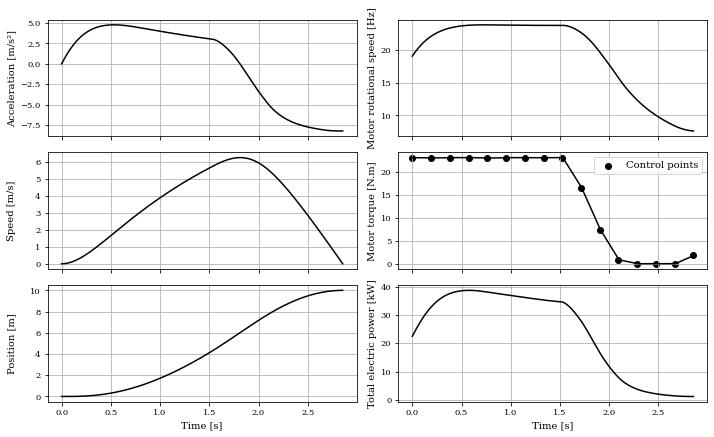

In [24]:
fig = plot_trajectory(optim_problem_trajectory_design.model.trajectory.trajectory.res, problem=optim_problem_trajectory_design)

In [25]:
fig.savefig("trajectory_design_optimization_openmdao.pdf")

In [26]:
api.optimization_viewer(CO_DESIGN_CONFIGURATION_FILE)

In [27]:
OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_outputs.xml')
TRAJECTORY_DESIGN_OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_outputs_trajectory_design.xml')
shutil.copy(OUTPUT_FILE, TRAJECTORY_DESIGN_OUTPUT_FILE)
api.variable_viewer(TRAJECTORY_DESIGN_OUTPUT_FILE)

### Plotting together

<ipython-input-28-d56a5d28a9dc>:108: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = fig.legend([l1, l2],     # The line objects


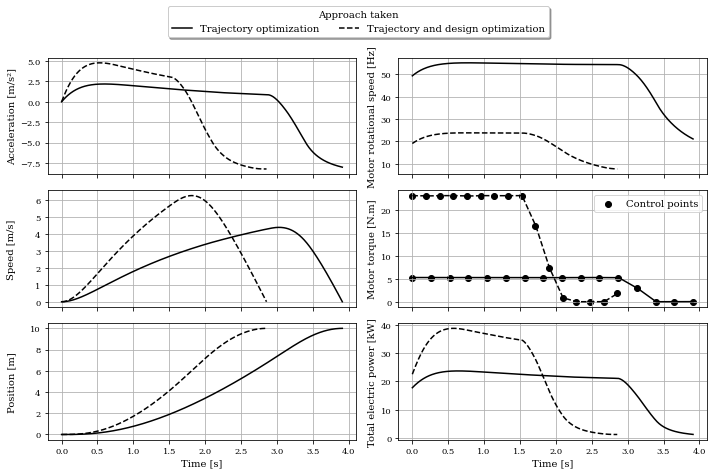

In [28]:
import numpy as np

import matplotlib.pyplot as plt

plt.rc("font", family="serif")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")

res = optim_problem_trajectory.model.trajectory.trajectory.res
problem = optim_problem_trajectory

t = np.array(res["time"])
xpp = res["droneMassPropeller.der(xp)"]
xp = res["droneMassPropeller.xp"]
x = res["droneMassPropeller.x"]
n = res["droneMassPropeller.n"]
T = res["droneMassPropeller.T"]
power = res["droneMassPropeller.Power"]

if problem:
    t0 = problem["data:trajectory:time"]
    T0 = problem["data:trajectory:torque"]


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(
    3, 2, sharex="col", figsize=(10, 6)
)

# Acceleration
l1 = ax1.plot(t, xpp, color='k')
ax1.set_ylabel("Acceleration [m/s²]")
# ax1.set_xlabel("Time [s]")
ax1.grid()

# Speed
ax3.plot(t, xp, color='k')
ax3.set_ylabel("Speed [m/s]")
# ax2.set_xlabel("Time [s]")
ax3.grid()

# Position
ax5.plot(t, x, color='k')
ax5.set_ylabel("Position [m]")
ax5.set_xlabel("Time [s]")
ax5.grid()

# Motor speed
ax2.plot(t, n, color='k')
ax2.set_ylabel("Motor rotational speed [Hz]")
# ax4.set_xlabel("Time [s]")
ax2.grid()

# Motor torque
ax4.plot(t, T, color='k')
if problem:
    ax4.scatter(t0, T0, color='k', label="Control points")
    ax4.legend()
ax4.set_ylabel("Motor torque [N.m]")
# ax5.set_xlabel("Time [s]")
ax4.grid()

# Total electric  power
ax6.plot(t, power * 1e-3, color='k')
ax6.set_ylabel("Total electric power [kW]")
ax6.set_xlabel("Time [s]")
ax6.grid()

res = optim_problem_trajectory_design.model.trajectory.trajectory.res
problem = optim_problem_trajectory_design

t = np.array(res["time"])
xpp = res["droneMassPropeller.der(xp)"]
xp = res["droneMassPropeller.xp"]
x = res["droneMassPropeller.x"]
n = res["droneMassPropeller.n"]
T = res["droneMassPropeller.T"]
power = res["droneMassPropeller.Power"]

if problem:
    t0 = problem["data:trajectory:time"]
    T0 = problem["data:trajectory:torque"]


# Acceleration
l2 = ax1.plot(t, xpp, color='k', ls='dashed')

# Speed
ax3.plot(t, xp, color='k', ls='dashed')

# Position
ax5.plot(t, x, color='k', ls='dashed')

# Motor speed
ax2.plot(t, n, color='k', ls='dashed')

# Motor torque
ax4.plot(t, T, color='k', ls='dashed')
if problem:
    ax4.scatter(t0, T0, color='k')

# Total electric  power
ax6.plot(t, power * 1e-3, color='k', ls='dashed')


line_labels = ["Trajectory optimization", "Trajectory and design optimization"]

# Create the legend
legend = fig.legend([l1, l2],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           # borderaxespad=0.1,    # Small spacing around legend box
           title="Approach taken",  # Title for the legend
           bbox_to_anchor=(0.5, 1.01),
           ncol=4, fancybox=True, shadow=True
           )

fig.align_ylabels()
fig.tight_layout()
# plt.legend()
fig.savefig("trajectory_vs_trajectory_and_design.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')

plt.show()

In [32]:
18.7*60

1122.0